#**Predicción de robos Medellín**
**Integrantes:**
* Santiago Escobar
*Santiago Posada

#1. ¿El aprendizaje automático es apropado para este tema?, si o no por qué?

si porque para poder hacer las predicciones con la información de los datos de los robos en la ciudad de Medellin necesitamos de esta rama del Machine Learning, la cual no ayuda a poder cumplir con las predicciones haciendo uso de las variables que tenemos.
El algoritmo que tenemos pensado para entrenar es el de clasificación de árbol
(decisión tree classifier) la cual hace un mapeo de y busca el valor objetivo, este es el tipo de aprendizaje usado.

#2. ¿Cuál es el problema de ml si hay uno, y cómo sería una métrica de exito?
el problema Machine Learning es que nos diga cual es la modalidad de robo que tiene mayor probabilidad de darse dado: 
sexo,
edad,
estado civil,
medio de transporte,
arma medio,
nombre del barrio,
lugar,
bien,
categoria del bien,
la métrica de éxito para saber si resolvemos el problema planteado es que con un nivel alto de certeza el algoritmo prediga la modalidad de robo que se va a dar en algún lugar de la ciudad.
#3. ¿Qué tipo de Ml es este?
El tipo de Machine Learning usado es el de aprendizaje supervisado ya que contamos con todos los datos etiquetados, lo que permitirá al algoritmo hacer las tareas previstas.
#4. ¿Los datos son apropiados?
Sí, los datos son los apropiados porque gracias a su cantidad el algoritmo podrá hacer predicciones más asertivas y también nos dará paso al siguiente ítem de predicciones.


dataset extraído de: http://medata.gov.co/dataset/hurto-persona/resource/1e946b96-c233-4171-bdb7-9a89c4e7790e#{}


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OrdinalEncoder


se carga la carpeta de drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


se lee el dataset


In [ ]:
import pandas as pd
df_hurto = pd.read_csv()
print("Número de registros: {}".format(df_hurto.shape[0]))

Número de registros: 280870


Ver los primeros diez datos

In [ ]:
df_hurto.head(10)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2012-01-01T14:00:00.000-05:00,1,6.231846,-75.553096,Hombre,32,Soltero(a),Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y tÃ­tulo valor",MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
1,2012-01-01T17:00:00.000-05:00,1,6.240398,-75.553902,Hombre,22,Soltero(a),Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Villa Hermosa,Accesorios prendas de vestir,Prendas de vestir y accesorios,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
2,2012-01-01T19:00:00.000-05:00,1,6.283231,-75.563025,Hombre,30,Soltero(a),Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Aranjuez,Billetera,Prendas de vestir y accesorios,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
3,2012-01-01T08:00:00.000-05:00,1,6.266206,-75.552739,Hombre,22,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Manrique,Autopartes,Autoparte y elementos de la mecÃ¡nica automotriz,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
4,2012-01-01T10:30:00.000-05:00,1,6.248981,-75.621441,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Residencia,San Javier,CÃ©dula,Documentos,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
5,2012-01-01T23:00:00.000-05:00,1,6.263590,-75.559744,Hombre,28,UniÃ³n marital de hecho,Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Candelaria,Celular,TecnologÃ­a,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
6,2012-01-01T02:00:00.000-05:00,1,6.258836,-75.566920,Hombre,52,Casado(a),Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Candelaria,Billetera,Prendas de vestir y accesorios,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
7,2012-01-01T00:00:00.000-05:00,1,6.267957,-75.593292,Mujer,70,Casado(a),Sin dato,Sin dato,Sin dato,...,Residencia,Laureles,Accesorios prendas de vestir,Prendas de vestir y accesorios,MercancÃ­a,-1,Oro,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
8,2012-01-01T04:30:00.000-05:00,1,NaN,NaN,Hombre,18,Soltero(a),Sin dato,Sin dato,Sin dato,...,VÃ­a pÃºblica,Aranjuez,Billetera,Prendas de vestir y accesorios,MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
9,2012-01-01T14:30:00.000-05:00,1,NaN,NaN,Hombre,28,Sin dato,Sin dato,Sin dato,Sin dato,...,Bus de servicio pÃºblico,Castilla,Peso,"Dinero, joyas, piedras preciosas y tÃ­tulo valor",MercancÃ­a,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00


# Eliminamos las columnas que no nos sirvan
cantidad,latitud,longitud,parentesco,unidad de medida,permiso,color,modelo, grupo bien, categoría penal, artículo penal, conducta especial, caracterización, conducta , testigo, sede receptora, codigo comuna, codigo barrio, nivel academico,grupo especial, discapacidad, ocupacion, actividad delictiva y grupo actor

Eliminamos estas columnas por que para las predicciones que queremos realizar no son relevantes


In [ ]:
df_hurto = df_hurto.drop(['cantidad', 'latitud', 'longitud', 'parentesco', 'unidad_medida','permiso',
                          'color', 'modelo', 'grupo_bien',  'categoria_penal', 'articulo_penal',
                          'conducta_especial', 'caracterizacion', 'conducta', 'testigo','sede_receptora', 'nivel_academico','grupo_especial','discapacidad',
                          'ocupacion','actividad_delictiva','grupo_actor','fecha_ingestion','codigo_barrio','codigo_comuna','fecha_hecho' ], axis=1)

#Columnas que vamos a utilizar
* ***fecha_hecho***: fecha en que ocurrió el hecho
* ***sexo***: sexo de la víctima
*	***Edad***: edad de la víctima
*	***Estado_civil***: estado civil de la víctima
*	***Medio_transporte***: medio transporte donde se movilizaba la víctima
*	***Modalidad***: es la forma como se materializa el hecho
*	***Arma_medio***: es el arma, medio o mecanísmo con el que se comete el hecho
*	***Nombre_barrio***: nombre del barrio donde ocurrieron los hechos
*	***Lugar***: lugar donde ocurrieron los hechos. El lugar es una tipificación del urbanismo más cercano al hecho
*	***Categoría_bien***: agrupación de bienes, nivel intermedio de agregación
*	***bien***: nombre del bien de a víctima


# Reemplazar datos mal escritos


In [ ]:
df_hurto=df_hurto.replace(['VÃ­a pÃºblica'],'vía pública')
df_hurto=df_hurto.replace(['CÃ©dula'],'Cédula')
df_hurto=df_hurto.replace(['Bus de servicio pÃºblico'],'Bus de servicio público')
df_hurto=df_hurto.replace(['JesÃºs Nazareno'],'Jesús Nazareno')
df_hurto=df_hurto.replace(['ClonaciÃ³n de tarjeta'],'Clonación de tarjeta')
df_hurto=df_hurto.replace(['EngaÃ±o'],'Engaño')
df_hurto=df_hurto.replace(['AutomÃ³vil'],'Automóvil')
df_hurto=df_hurto.replace(['BombonÃ¡ No.1'],'Bomboná No.1')
df_hurto=df_hurto.replace(['Santa MÃ³nica'],'Santa Mónica')
df_hurto=df_hurto.replace(['BoyacÃ¡'],'Boyacá')
df_hurto=df_hurto.replace(['JardÃ­n BotÃ¡nico'],'Jardín Botánico')
df_hurto=df_hurto.replace(['EstaciÃ³n Villa'],'Estación Villa')
df_hurto=df_hurto.replace(['Santa MarÃ­a de los Ãngeles'],'Santa María de los Ángeles')
df_hurto=df_hurto.replace(['La AmÃ©rica'],'La América')
df_hurto=df_hurto.replace(['Santa FÃ©'],'Santa Fé')
df_hurto=df_hurto.replace(['BelÃ©n'],'Belén')
df_hurto=df_hurto.replace(['Barrio ColÃ³n'],'Barrio Colón')
df_hurto=df_hurto.replace(['CorazÃ³n de JesÃºs'],'Corazón de Jesús')
df_hurto=df_hurto.replace(['Alfonso LÃ³pez'],'Alfonso López')
df_hurto=df_hurto.replace(['BatallÃ³n Girardot'],'Batallón Girardot')
df_hurto=df_hurto.replace(['SimÃ³n BolÃ­var'],'Simón Bolívar')
df_hurto=df_hurto.replace(['Ãrea Urbana Cgto. San Antonio de Prado'],'Área Urbana Cgto. San Antonio de Prado')
df_hurto=df_hurto.replace(['San GermÃ¡n'],'San Germán')
df_hurto=df_hurto.replace(['HÃ©ctor Abad GÃ³mez'],'Héctor Abad Gómez')
df_hurto=df_hurto.replace(['Ãrea de expansiÃ³n San Antonio De Prado'],'Área de expansión San Antonio De Prado')
df_hurto=df_hurto.replace(['La MansiÃ³n'],'La Mansión')
df_hurto=df_hurto.replace(['Los Ãngeles'],'Los Ángeles')
df_hurto=df_hurto.replace(['Santa LucÃ­a'],'Santa Lucía')
df_hurto=df_hurto.replace(['El VelÃ³dromo'],'El Velódromo')
df_hurto=df_hurto.replace(['CÃ³rdoba'],'Córdoba')
df_hurto=df_hurto.replace(['CataluÃ±a'],'Cataluña')
df_hurto=df_hurto.replace(['Campo ValdÃ©s No.1'],'Campo Valdés No.1')
df_hurto=df_hurto.replace(['AlejandrÃ­a'],'Alejandrí­a')
df_hurto=df_hurto.replace(['ClonaciÃ³n de tarjeta'],'Clonación de tarjeta')
df_hurto=df_hurto.replace(['RetenciÃ³n de dinero'],'Retención de dinero')
df_hurto=df_hurto.replace(['EngaÃ±o'],'Engaño')
df_hurto=df_hurto.replace(['UniÃ³n marital de hecho'],'Unión marital de hecho')
df_hurto=df_hurto.replace(['InformÃ¡tico'],'Informático')
df_hurto=df_hurto.replace(['SuplantaciÃ³n'],'Suplantación')
df_hurto=df_hurto.replace(['Enfrentamiento con la fuerza pÃºblica'],'Enfrentamiento con la fuerza pública')
df_hurto=df_hurto.replace(['RetenciÃ³n de tarjeta'],'Retención de tarjeta')
df_hurto=df_hurto.replace(['TÃ³xico o QuÃ\xadmico'],'Tóxico o Químico')
df_hurto=df_hurto.replace(['ComisiÃ³n de delito'],'Comisión de delito')
df_hurto=df_hurto.replace(['Nueva Villa de la IguanÃ¡'],'Nueva Villa de la Iguaná')
df_hurto=df_hurto.replace(['Hospital San Vicente de PaÃºl'],'Hospital San Vicente de Paúl')
df_hurto=df_hurto.replace(['El RincÃ³n'],'El Rincón')
df_hurto=df_hurto.replace(['BombonÃ¡ No.2'],'Bomboná No.2')
df_hurto=df_hurto.replace(['La PiÃ±uela'],'La Piñuela')
df_hurto=df_hurto.replace(['El CorazÃ³n'],'El Corazón')
df_hurto=df_hurto.replace(['Barrio CristÃ³bal'],'Barrio Cristóbal')
df_hurto=df_hurto.replace(['Nueva Villa del AburrÃ¡'],'Nueva Villa del Aburrá')
df_hurto=df_hurto.replace(['Campo ValdÃ©s No.2'],'Campo Valdés No.2')
df_hurto=df_hurto.replace(['Ã\x81rea de expansiÃ³n BelÃ©n'],'Área de expansión Belén')
df_hurto=df_hurto.replace(['Ã\x81rea de expansiÃ³n Calasanz'],'Área de expansión Calasanz')
df_hurto=df_hurto.replace(['BelalcÃ¡zar'],'Belalcázar')
df_hurto=df_hurto.replace(['Antonio NariÃ±o'],'Antonio Nariño')
df_hurto=df_hurto.replace(['San MartÃ\xadn de Porres'],'San Martín de Porres')
df_hurto=df_hurto.replace(['Ã\x81rea de expansiÃ³n Altavista'],'Área de expansión Altavista')
df_hurto=df_hurto.replace(['Ã\x81rea de expansiÃ³n Eduardo Santos'],'Área de expansión Eduardo Santos')
df_hurto=df_hurto.replace(['MarÃ\xada Cano-Carambolas'],'María Cano-Carambolas')
df_hurto=df_hurto.replace(['AndalucÃ\xada'],'Andalucía')
df_hurto=df_hurto.replace(['Los AlcÃ¡zares'],'Los Alcázares')
df_hurto=df_hurto.replace(['San JoaquÃ\xadn'],'San Joaquín')
df_hurto=df_hurto.replace(['Ã\x81rea Urbana Cgto. San CristÃ³bal'],'Área Urbana Cgto. San Cristóbal')
df_hurto=df_hurto.replace(['San JosÃ© la Cima No.2'],'San José la Cima No.2')
df_hurto=df_hurto.replace(['MoscÃº No.1'],'Moscú No.1')
df_hurto=df_hurto.replace(['FÃ¡tima'],'Fátima')
df_hurto=df_hurto.replace(['PlayÃ³n de los Comuneros'],'Playón de los Comuneros')
df_hurto=df_hurto.replace(['Área de expansión Pajarito'],'Área de expansión Pajarito')
df_hurto=df_hurto.replace(['Diego EchavarrÃ\xada'],'Diego Echavarría')
df_hurto=df_hurto.replace(['Alejandro EchavarrÃ\xada'],'Alejandro Echavarría')
df_hurto=df_hurto.replace(['Alejandrí\xada'],'Alejandría')
df_hurto=df_hurto.replace(['MoscÃº No.2'],'Moscú No.2')
df_hurto=df_hurto.replace(['San JosÃ© la Cima No.1'],'San José la Cima No.1')
df_hurto=df_hurto.replace(['Santa InÃ©s'],'Santa Inés')
df_hurto=df_hurto.replace(['BatallÃ³n Cuarta Brigada'],'Batallón Cuarta Brigada')
df_hurto=df_hurto.replace(['LÃ³pez de Mesa'],'López de Mesa')
df_hurto=df_hurto.replace(['San Jose de La MontaÃ±a'],'San Jose de La Montaña')
df_hurto=df_hurto.replace(['Barrios de JesÃºs'],'Barrios de Jesús')
df_hurto=df_hurto.replace(['Ã\x81rea de expansiÃ³n Pajarito'],'Área de expansión Pajarito')
df_hurto=df_hurto.replace(['Elementos para la iluminaciÃ³n'],'Elementos para la iluminación')
df_hurto=df_hurto.replace(['Equipamiento servicios pÃºblicos'],'Equipamiento servicios públicos')
df_hurto=df_hurto.replace(['Dinero, joyas, piedras preciosas y tÃ\xadtulo valor'],'Dinero, joyas, piedras preciosas y título valor')
df_hurto=df_hurto.replace(['ElectrodomÃ©sticos'],'Electrodomésticos')
df_hurto=df_hurto.replace(['PÃ³lvora'],'Pólvora')
df_hurto=df_hurto.replace(['Autoparte y elementos de la mecÃ¡nica automotriz'],'Autoparte y elementos de la mecánica automotriz')
df_hurto=df_hurto.replace(['VehÃ\xadculos de 2 o 4 ruedas'],'Vehículos de 2 o 4 ruedas')
df_hurto=df_hurto.replace(['QuÃ\xadmicos'],'Químicos')
df_hurto=df_hurto.replace(['ArtÃ\xadculos de fumador'],'Artículos de fumador')
df_hurto=df_hurto.replace(['Materiales y elementos para la construcciÃ³n'],'Materiales y elementos para la construcción')
df_hurto=df_hurto.replace(['ArtÃ\xadculos mÃ©dicos'],'Artículos médicos')
df_hurto=df_hurto.replace(['Accesorios militares, policÃ\xada o vigilancia privada'],'Accesorios militares, policía o vigilancia privada')
df_hurto=df_hurto.replace(['LibrerÃ\xada, PapelerÃ\xada y Ãºtiles'],'Librería, Papelería y téxtiles')
df_hurto=df_hurto.replace(['Equipamiento vÃ\xadas y seÃ±alizaciÃ³n'],'Equipamiento vías y señalización')
df_hurto=df_hurto.replace(['TecnologÃ\xada'],'Tecnología')
df_hurto=df_hurto.replace(['VehÃ\xadculo panel'],'Vehículo panel')
df_hurto=df_hurto.replace(['MuniciÃ³n'],'Munición')
df_hurto=df_hurto.replace(['Drogas alucinÃ³genas'],'Drogas alucinógenas')
df_hurto=df_hurto.replace(['MÃºsica'],'Música')
df_hurto=df_hurto.replace(['EstaciÃ³n del Metro'],'Estación del Metro')
df_hurto=df_hurto.replace(['CafÃ© internet'],'Café internet')
df_hurto=df_hurto.replace(['FÃ¡brica o empresa'],'Fábrica o empresa')
df_hurto=df_hurto.replace(['Sede polÃ\xadtica'],'Sede política')
df_hurto=df_hurto.replace(['DroguerÃ\xada o farmacia'],'Droguería o farmacia')
df_hurto=df_hurto.replace(['VehÃ\xadculo particular'],'Vehículo particular')
df_hurto=df_hurto.replace(['CafeterÃ\xada'],'Cafetería')
df_hurto=df_hurto.replace(['Institución educativa (jardín, primaria o secundaria)'],'Institución educativa (jardín, primaria o secundaria)')
df_hurto=df_hurto.replace(['CorporaciÃ³n'],'Corporación')
df_hurto=df_hurto.replace(['Taller mecÃ¡nico'],'Taller mecánico')
df_hurto=df_hurto.replace(['CÃ¡rcel'],'Cárcel')
df_hurto=df_hurto.replace(['TurÃ\xadstico'],'Turístico')
df_hurto=df_hurto.replace(['EstaciÃ³n de gasolina'],'Estación de gasolina')
df_hurto=df_hurto.replace(['ProstÃ\xadbulo'],'Prostíbulo')
df_hurto=df_hurto.replace(['Obra en construcciÃ³n'],'Obra en construcción')
df_hurto=df_hurto.replace(['Centro de belleza o estÃ©tica'],'Centro de belleza o estética')
df_hurto=df_hurto.replace(['InstituciÃ³n de educaciÃ³n superior'],'Institución de educación superior')
df_hurto=df_hurto.replace(['Funeraria y sala de velaciÃ³n'],'Funeraria y sala de velación')
df_hurto=df_hurto.replace(['InstalaciÃ³n gubernamental'],'Instalación gubernamental')
df_hurto=df_hurto.replace(['LibrerÃ\xada'],'Librería')
df_hurto=df_hurto.replace(['JoyerÃ\xada'],'Joyería')
df_hurto=df_hurto.replace(['InstalaciÃ³n fuerza pÃºblica'],'Instalación fuerza pública')
df_hurto=df_hurto.replace(['BaÃ±o'],'Baño')
df_hurto=df_hurto.replace(['Matadero, carnicerÃ\xada y similar'],'Matadero, carnicería y similar')
df_hurto=df_hurto.replace(['PanaderÃ\xada'],'Panadería')
df_hurto=df_hurto.replace(['Lote baldÃ\xado'],'Lote baldío')
df_hurto=df_hurto.replace(['EstaciÃ³n del Metro plus'],'Estación del Metro plus')
df_hurto=df_hurto.replace(['Consultorio jurÃ\xaddico'],'Consultorio jurídico')
df_hurto=df_hurto.replace(['Laboratorios de procesamiento de drogaílicita'],'Laboratorios de procesamiento de droga ílicita')
df_hurto=df_hurto.replace(['Laboratorios de procesamiento de droga Ã\xadlicita'],'Laboratorios de procesamiento de droga ílicita')
df_hurto=df_hurto.replace(['Cajero electrÃ³nico'],'Cajero electrónico')
df_hurto=df_hurto.replace(['AlmacÃ©️n tienda y otro'],'Almacén tienda y otro')
df_hurto=df_hurto.replace(['InstalaciÃ³n judicial'],'Instalación judicial')
df_hurto=df_hurto.replace(['InstituciÃ³n educativa (jardÃ\xadn, primaria o secundaria)'],'Institución educativa (jardín, primaria o secundaria)')
df_hurto=df_hurto.replace(['AlmacÃ©n tienda y otro'],'Almacén tienda y otro') 
df_hurto=df_hurto.replace(['AviÃ³n'],'Avión') 
df_hurto=df_hurto.replace(['Sin dato tecnologÃ\xada'],'Sin dato tecnología') 
df_hurto=df_hurto.replace(['LÃ\xadnea telefÃ³nica'],'Línea telefónica') 
df_hurto=df_hurto.replace(['CinturÃ³n'],'Cinturón') 
df_hurto=df_hurto.replace(['PeluquerÃ\xada'],'Peluquería') 
df_hurto=df_hurto.replace(['LociÃ³n'],'Revólver') 
df_hurto=df_hurto.replace(['LÃ\xadquido limpiador'],'Líquido limpiador') 
df_hurto=df_hurto.replace(['MÃ³dem'],'Módem') 
df_hurto=df_hurto.replace(['Alcohol (quÃ\xadmico)'],'Alcohol (químico)') 
df_hurto=df_hurto.replace(['DatÃ¡fono'],'Datáfono') 
df_hurto=df_hurto.replace(['Gato hidrÃ¡ulico'],'Gato hidráulico')
df_hurto=df_hurto.replace(['DatÃ¡fono'],'Datáfono')
df_hurto=df_hurto.replace(['MÃ¡ster'],'Máster')
df_hurto=df_hurto.replace(['ArtÃ\xadculo para video'],'Artículo para video')
df_hurto=df_hurto.replace(['Gato hidrÃ¡ulico'],'Gato hidráulico')
df_hurto=df_hurto.replace(['CamiÃ³n'],'Camión')
df_hurto=df_hurto.replace(['ArnÃ©s'],'Arnés')
df_hurto=df_hurto.replace(['HelicÃ³ptero'],'Helicóptero')
df_hurto=df_hurto.replace(['ArtÃ\xadculos de aseo personal'],'Artículos de aseo personal')
df_hurto=df_hurto.replace(['Productos homeopÃ¡ticos'],'Productos homeopáticos')
df_hurto=df_hurto.replace(['ArtÃ\xadculos y ropa de cama'],'Artículos y ropa de cama')
df_hurto=df_hurto.replace(['Articulos electrÃ³nica'],'Articulos electrónica')
df_hurto=df_hurto.replace(['Elementos construcciÃ³n hogar'],'Elementos construcción hogar')
df_hurto=df_hurto.replace(['CerÃ¡micas'],'Cerámicas')
df_hurto=df_hurto.replace(['Sin dato tÃ\xadtulos valor'],'Sin dato títulos valor')
df_hurto=df_hurto.replace(['ArtÃ\xadculos de aseo personal'],'Artículos de aseo personal')
df_hurto=df_hurto.replace(['LÃ¡mpara de alumbrado'],'Lámpara de alumbrado')
df_hurto=df_hurto.replace(['LoterÃ\xadas'],'Loterías')
df_hurto=df_hurto.replace(['AlgodÃ³n'],'Algodón')
df_hurto=df_hurto.replace(['Elemento quÃ\xadmico'],'Elemento químico')
df_hurto=df_hurto.replace(['ArtÃ\xadculos alimenticios'],'Artículos alimenticios')
df_hurto=df_hurto.replace(['PerfumerÃ\xada'],'Perfumería')
df_hurto=df_hurto.replace(['DecoraciÃ³n del hogar'],'Decoración del hogar')
df_hurto=df_hurto.replace(['SoluciÃ³n salina'],'Solución salina')
df_hurto=df_hurto.replace(['Sin dato articulos electrÃ³nica'],'Sin dato articulos electrónica')
df_hurto=df_hurto.replace(['ContraseÃ±a cÃ©dula'],'Contraseña cédula')
df_hurto=df_hurto.replace(['Juegos y muÃ±ecos'],'Juegos y muñecos')
df_hurto=df_hurto.replace(['Tintas para litografÃ\xada'],'Tintas para litografía')
df_hurto=df_hurto.replace(['CocaÃ\xadna'],'Cocaína')
df_hurto=df_hurto.replace(['PelÃ\xadculas'],'Películas')
df_hurto=df_hurto.replace(['MÃ¡quina'],'Máquina')
df_hurto=df_hurto.replace(['Animales domÃ©sticos'],'Animales domésticos')
df_hurto=df_hurto.replace(['Anillos plÃ¡sticos'],'Anillos plásticos')
df_hurto=df_hurto.replace(['Planta elÃ©ctrica'],'Planta electróctrica')
df_hurto=df_hurto.replace(['Sin dato mÃ©dico'],'Sin dato médico')
df_hurto=df_hurto.replace(['Calibre municiÃ³n'],'Calibre munición')
df_hurto=df_hurto.replace(['Accesorios de peluquerÃ\xada'],'Accesorios de peluquería')
df_hurto=df_hurto.replace(['RevisiÃ³n tÃ©️cnico mecÃ¡nica'],'Revisión técnico mecánica')
df_hurto=df_hurto.replace(['BalÃ³n de fÃºtbol'],'Balón de fútbol')
df_hurto=df_hurto.replace(['LÃ¡cteos'],'Lácteos')
df_hurto=df_hurto.replace(['BolÃ\xadvar venezolano'],'Bolívar venezolano')
df_hurto=df_hurto.replace(['Material de construcciÃ³n'],'Material de construcción')
df_hurto=df_hurto.replace(['TelÃ©fono satelital'],'Teléfono satelital')
df_hurto=df_hurto.replace(['BÃ¡sculal'],'Báscula')
df_hurto=df_hurto.replace(['CronÃ³metro'],'Cronómetro')
df_hurto=df_hurto.replace(['CarÃ¡tula'],'Carátula')
df_hurto=df_hurto.replace(['Pistola neumÃ¡tica'],'Pistola neumática')
df_hurto=df_hurto.replace(['Forro para electrodomÃ©stico'],'Forro para electrodomestico')
df_hurto=df_hurto.replace(['GrÃºa'],'Grúa')
df_hurto=df_hurto.replace(['CÃ¡mara'],'Cámara')
df_hurto=df_hurto.replace(['Juguete arma bÃ©lica'],'Juguete arma bélica')
df_hurto=df_hurto.replace(['Platinas fÃ©rreos'],'Platinas férreos')
df_hurto=df_hurto.replace(['MicrÃ³fono'],'Micrófono')
df_hurto=df_hurto.replace(['CartÃ³n'],'Cartón')
df_hurto=df_hurto.replace(['ArtÃ\xadculo de laboratorio'],'Artículo de laboratorio')
df_hurto=df_hurto.replace(['Ave de jaula o pequeÃ±a'],'Ave de jaula o pequeña')
df_hurto=df_hurto.replace(['Sin dato electrodomÃ©sticos'],'Sin dato electrodomésticos')
df_hurto=df_hurto.replace(['PagarÃ©'],'Pagaré')
df_hurto=df_hurto.replace(['MaletÃ\xadn'],'Maletín')
df_hurto=df_hurto.replace(['VÃ¡lvulas'],'Válvulas')
df_hurto=df_hurto.replace(['Productos quÃ\xadmicos'],'Productos químicos')
df_hurto=df_hurto.replace(['Consultorio mÃ©dico'],'Consultorio médico')
df_hurto=df_hurto.replace(['Bolsa plÃ¡stica'],'Bolsa plástica')
df_hurto=df_hurto.replace(['CilÃ\xadndros de gas'],'Cilíndros de gas')
df_hurto=df_hurto.replace(['Sin dato municiÃ³n'],'Sin dato munición')
df_hurto=df_hurto.replace(['ElectrodomÃ©sticos cocina y limpieza hogar'],'Electrodomésticos cocina y limpieza hogar')
df_hurto=df_hurto.replace(['DocumentaciÃ³n electoral'],'Documentación electoral')
df_hurto=df_hurto.replace(['MegÃ¡fono'],'Megáfono')
df_hurto=df_hurto.replace(['AnalgÃ©sico'],'Analgésico')
df_hurto=df_hurto.replace(['MÃ¡quina industrial'],'Máquina industrial')
df_hurto=df_hurto.replace(['Carro comidas rÃ¡pidas'],'Carro comidas rápidas')
df_hurto=df_hurto.replace(['FotografÃ\xadas'],'Fotografías')
df_hurto=df_hurto.replace(['ElectrodomÃ©stico video y audio y accesorios'],'Electrodoméstico video y audio y accesorios')
df_hurto=df_hurto.replace(['Bomba elÃ©ctrica'],'Bomba eléctrica')
df_hurto=df_hurto.replace(['Torres de energÃ\xada'],'Torres de energía')
df_hurto=df_hurto.replace(['RadiomÃ³dem'],'Radiomódem')
df_hurto=df_hurto.replace(['Aparato mÃ©dico'],'Aparato médico')
df_hurto=df_hurto.replace(['CamÃ¡ndulas'],'Camándulas')
df_hurto=df_hurto.replace(['LÃ¡mina'],'Lámina')
df_hurto=df_hurto.replace(['LÃ¡mpara secadora'],'Lámpara secadora')
df_hurto=df_hurto.replace(['TuberÃ\xada'],'Tubería')
df_hurto=df_hurto.replace(['Insumo mÃ©dico'],'Insumo médico')
df_hurto=df_hurto.replace(['SeÃ±ales de trÃ¡nsito'],'Señales de tránsito')
df_hurto=df_hurto.replace(['DÃ³lar'],'Dólar')
df_hurto=df_hurto.replace(['PÃ³liza de seguro'],'Póliza de seguro')
df_hurto=df_hurto.replace(['Tarjeta de comunicaciÃ³n'],'Tarjeta de comunicación')
df_hurto=df_hurto.replace(['Forro para electrodomestico'],'Forro para electrodoméstico')
df_hurto=df_hurto.replace(['RevÃ³lver'],'Revólver')
df_hurto=df_hurto.replace(['RevisiÃ³n tÃ©cnico mecÃ¡nica'],'Revisión técnico mecánica')
df_hurto=df_hurto.replace(['BÃ¡scula'],'Báscula')

#Borrar datos en null
como nuestro dataset además de tener datos en null también tiene campos llenos en 'Sin dato' por lo que a continuación procederemos a borrar las filas que tengan este campo.Un ejemplo de como lo realizamos es, pararnos en la columna de sexo y si ete tiene un dato null se elimina la fila.

Borramos los registros en null para que nuestro algoritmo a la hra de ser entrenado no tenga ningún problema y podemos hacer esto con libertad por la cantidad de datos que tenemos.


comprobamos lo dicho anteriormente

In [ ]:
df_hurto.isnull().sum()


NameError: ignored

In [ ]:
print("Número de registros: {}".format(df_hurto.shape[0]))

Número de registros: 280870


In [ ]:
df_hurto.drop(df_hurto.index[(df_hurto['sexo']== 'Sin dato')],axis=0,inplace=True )

df_hurto.drop(df_hurto.index[(df_hurto['edad']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['estado_civil']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['medio_transporte']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['modalidad']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['arma_medio']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['nombre_barrio']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['lugar']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['categoria_bien']== 'Sin dato')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['categoria_bien']== 'Sin dato mercancÃ\xadas')],axis=0,inplace=True )
df_hurto.drop(df_hurto.index[(df_hurto['bien']== 'Sin dato')],axis=0,inplace=True )

comprobamos que si se hayan eliminado

In [ ]:
print("Número de registros: {}".format(df_hurto.shape[0]))

Número de registros: 249845


visualizamos como  queda la tabla

In [ ]:
df_hurto.head(10)


,sexo,edad,estado_civil,medio_transporte,modalidad,arma_medio,nombre_barrio,lugar,bien,categoria_bien
0,Hombre,32,Soltero(a),Automóvil,Descuido,No,Cataluña,vía pública,Peso,"Dinero, joyas, piedras preciosas y título valor"
2,Hombre,30,Soltero(a),Caminata,Atraco,Arma de fuego,Aranjuez,vía pública,Billetera,Prendas de vestir y accesorios
3,Hombre,22,Soltero(a),Motocicleta,Descuido,No,Manrique Central No.2,Parqueadero,Autopartes,Autoparte y elementos de la mecánica automotriz
4,Hombre,29,Soltero(a),Caminata,Descuido,No,Las Independencias,Residencia,Cédula,Documentos
5,Hombre,28,Unión marital de hecho,Taxi,Atraco,Arma de fuego,San Pedro,vía pública,Celular,Tecnología
6,Hombre,52,Casado(a),Caminata,Cosquilleo,No,Jesús Nazareno,vía pública,Billetera,Prendas de vestir y accesorios
7,Mujer,70,Casado(a),Caminata,Descuido,No,Los Colores,Residencia,Accesorios prendas de vestir,Prendas de vestir y accesorios
8,Hombre,18,Soltero(a),Caminata,Atraco,Objeto contundente,Campo Valdés No.1,vía pública,Billetera,Prendas de vestir y accesorios
10,Hombre,23,Soltero(a),Taxi,Atraco,Objeto contundente,Picacho,vía pública,Billetera,Prendas de vestir y accesorios
12,Hombre,28,Unión marital de hecho,Taxi,Atraco,Arma de fuego,San Pedro,vía pública,Peso,"Dinero, joyas, piedras preciosas y título valor"


# Pasar variables categóricas a numéricas
trata de reemplazar cada variable con un número entero distinto. Este primer caso lo realizamos con el sexo de cada persona, hombre=0 y mujer=1.

In [ ]:
encoder = OrdinalEncoder(categories=[["Hombre","Mujer"]])

encoder.fit(df_hurto[["sexo"]])
df_hurto["sex_num"] = encoder.transform(df_hurto[["sexo"]])

df_hurto[["sexo", "sex_num"]].head(100)

,sexo,sex_num
0,Hombre,0.0
2,Hombre,0.0
3,Hombre,0.0
4,Hombre,0.0
5,Hombre,0.0
...,...,...
121,Hombre,0.0
122,Mujer,1.0
123,Hombre,0.0
124,Hombre,0.0


In [ ]:
#estado civil
encoder = OrdinalEncoder(categories=[["Soltero(a)","Unión marital de hecho","Casado(a)","Divorciado(a)","Viudo(a)"]])

encoder.fit(df_hurto[["estado_civil"]])
df_hurto["estado_civil_num"] = encoder.transform(df_hurto[["estado_civil"]])

df_hurto[["estado_civil", "estado_civil_num"]].head(10)

,estado_civil,estado_civil_num
0,Soltero(a),0.0
2,Soltero(a),0.0
3,Soltero(a),0.0
4,Soltero(a),0.0
5,Unión marital de hecho,1.0
6,Casado(a),2.0
7,Casado(a),2.0
8,Soltero(a),0.0
10,Soltero(a),0.0
12,Unión marital de hecho,1.0


In [ ]:
#modalidad
encoder = OrdinalEncoder(categories=[["Descuido","Raponazo","Atraco","Cosquilleo","Clonación de tarjeta","Engaño","Retención de dinero",
                                      "Rompimiento de ventana","Informático","Escopolamina",'Halado', 'Paquete chileno', 'Llave maestra', 
                                      'Comisión de delito', 'Fleteo', 'Suplantación', 'Rompimiento cerraduta', 'Enfrentamiento con la fuerza pública',
                                      'Forcejeo', 'Retención de tarjeta', 'Simulando necesidad', 'Vandalismo', 'Miedo o terror', 'Abuso de confianza', 'Llamada millonaria']])

encoder.fit(df_hurto[["modalidad"]])
df_hurto["modalidad_num"] = encoder.transform(df_hurto[["modalidad"]])



In [ ]:
#arma_medio
encoder = OrdinalEncoder(categories=[['Palanca', 'Llave maestra', 'Perro', 'Tóxico o Químico', 'Escopolamina', 'Arma cortopunzante', 'Objeto contundente', 'No', 'Arma de fuego']])

encoder.fit(df_hurto[["arma_medio"]])
df_hurto["arma_medio_num"] = encoder.transform(df_hurto[["arma_medio"]])

In [ ]:
#medio_transporte
encoder = OrdinalEncoder(categories=[['Automóvil', 'Bicicleta', 'Caminata', 'Motocicleta', 'Autobus', 'Planeador', 'Metro', 'Motocicleta con parrillero', 'Taxi']])

encoder.fit(df_hurto[["medio_transporte"]])
df_hurto["medio_transporte_num"] = encoder.transform(df_hurto[["medio_transporte"]])

In [ ]:
#nombre_barrio
encoder = OrdinalEncoder(categories=[['Piedras Blancas Matasano', 'Centro Administrativo', 'Llanaditas', 'La Loma', 'La Esperanza No.2', 'El Pesebre', 'Bosques de San Pablo', 
                                      'U.D. Atanasio Girardot', 'Santa María de los Ángeles', 'Veinte de Julio', 'Altavista', 'Carpinelo', 
                                      'El Corazon el Morro', 'Nueva Villa de la Iguaná', 'La Suiza', 'Fuente Clara', 'Los Alpes', 'Altos del Poblado',
                                      'Hospital San Vicente de Paúl', 'Santa Cruz', 'El Rincón', 'Bomboná No.2', 'La Piñuela', 'La Esperanza A.V.', 
                                      'Facultad de Minas U. Nacional', 'V. El Salado', 'Jardín Botánico', 'Trinidad', 'El Plan', 'Picacho', 'El Corazón', 
                                      'El Tesoro', 'Córdoba', 'El Triunfo', 'Naranjal', 'La Candelaria', 'San Javier No.1', 'Parque Norte', 'San Pablo A.V.',
                                      'La Hondonada', 'Cristo Rey', 'El Velódromo', 'Oleoducto', 'Olaya Herrera', 'Barrio Cristóbal', 'Versalles No.2', 
                                      'La Colina', 'Loreto', 'San Pedro', 'La Castellana', 'El Danubio', 'U.P.B', 'Campo Amor', 'Villa Flora', 'La Cuchilla', 
                                      'Villa del Socorro', 'Picachito', 'Montanita', 'Aures No.2', 'Florencia', 'Las Granjas', 'San Germán', 'Monteclaro', 
                                      'Asomadera No.1', 'Moravia', 'Pedregal', 'Miravalle', 'Nueva Villa del Aburrá', 'Belencito', 'Campo Valdés No.2',
                                      'El Diamante', 'El Pinal', 'Bomboná No.1', 'Área de expansión Belén', 'La Pilarica', 'Prado', 'Pablo VI', 
                                      'Terminal de Transporte', 'La Florida', 'Batallón Girardot', 'Lorena', 'Estación Villa', 'Manrique Central No.1', 
                                      'Buenos Aires', 'Doce de Octubre No.1', 'El Uvito','La Esperanza', 'Santa Mónica', 'Progreso No.2', 'Betania',
                                      'La Sierra', 'San Isidro', 'Boyacá', 'Cataluña', 'Héctor Abad Gómez', 'La Ilusion', 'Tejelo', 'Santa Lucía',
                                      'Astorga', 'Las Palmas', 'Bello Horizonte', 'Pajarito', 'Villa Turbay', 'Los Cerros el Vergel', 'La Verde',
                                      'Área de expansión Calasanz', 'Jesús Nazareno', 'Las Estancias', 'Oriente', 'El Llano Santa Elena', 
                                      'Brasilia', 'Juan XXIIIi la Quiebra', 'Corazón de Jesús', 'Belalcázar', 'Santa Margarita', 
                                      'Universidad Nacional', 'Metropolitano', 'Los Colores', 'La Mansión', 'Cerro Nutibara Ins.', 'Plaza de Ferias', 'La Avanzada', 
                                      'Los Balsos No.2', 'Sin dato 60 San Cristobal', 'B. Cerro el Volador', 'Boston', 'Antonio Nariño', 'Sevilla', 'Rosales', 'El Socorro', 
                                      'Belén', 'Travesias', 'Mirador del Doce', 'Asomadera No.2', 'San Martín de Porres', 'Girardot', 'Área de expansión Altavista', 
                                      'Los Conquistadores', 'Doce de Octubre No.2', 'Área de expansión Eduardo Santos', 'Cuarta Brigada', 'Los Naranjos', 'Yarumalito',
                                      'Villa Carlota', 'La Ladera', 'Palmitas sector central', 'Juan Pablo II', 'San Jose', 'Piedra Gorda', 'María Cano-Carambolas', 
                                      'San Benito', 'Potrerito', 'Estadio', 'La América', 'Naranjal S.C.', 'El Yolombo', 'Área Urbana Cgto. San Antonio de Prado', 
                                      'Las Playas S.C.', 'Los Pinos', 'Andalucía', 'Santo Domingo Savio No.1', 'Parque Juan Pablo II', 'Tricentenario', 'Aguas Frias',
                                      'El Salvador', 'Santo Domingo Savio No.2','La Frontera', 'Los Alcázares', 'San Joaquín', 'Área Urbana Cgto. San Cristóbal', 
                                      'San Antonio', 'Villa Niza', 'El Carmelo', 'San Lucas', 'Palenque', 'Villa Nueva', 'El Salado', 'Campo Valdés No.1', 'Toscana', 
                                      'San José la Cima No.2', 'San Jose del Manzanillo', 'Pedregal Alto', 'Las Acacias', 'Las Palmas S.E.', 'La Frisola', 
                                      'Sin dato 80 San Antonio de Prado', 'El Pomar', 'Ecoparque Cerro El Volador', 'Sin dato 90 Santa Elena', 'Perpetuo Socorro', 'San Miguel',
                                      'Florida Nueva', 'Moscú No.1', 'Las Lomas No.1', 'Fátima', 'Campo Alegre', 'Playón de los Comuneros', 'Calasania Parte Alta',
                                      'Área de expansión Pajarito', 'El Jardin', 'El Rodeo', 'Barro Blanco', 'Media Luna', 'Caribe', 'La Rosa', 'Mazo', 'Sucre', 
                                      'La Aldea', 'San Bernardo', 'Nuevos Conquistadores', 'Trece de Noviembre', 'Kennedy', 'Santander', 'Altamira', 'Manrique Central No.2',
                                      'Villa Guadalupe', 'Simón Bolívar', 'Fac. Veterinaria y Zootecnia U.De.A.', 'El Diamante No.2', 'Las Independencias', 'La Cruz', 
                                      'Diego Echavarría', 'Los Balsos No.1', 'Castilla', 'Blanquizal', 'El Chagualo', 'La Gloria', 'La Mota', 'Alejandro Echavarría', 
                                      'San Diego', 'Miranda', 'El Castillo', 'Alejandría', 'Altavista Sector Central', 'El Picacho', 'Manrique Oriental', 'La Pradera', 
                                      'Versalles No.1', 'Villatina', 'El Raizal', 'Lalinde', 'Boqueron', 'Popular', 'Sin dato 10 La Candelaria', 'La Aguacatala', 'Gerona', 
                                      'Santa Teresita', 'Moscú No.2','La Loma de los Bernal', 'Patio Bonito', 'Los Mangos', 'Urquita', 'Barrio Colón', 'El Compromiso', 'Guayaquil', 
                                      'Carlos E. Restrepo', 'Bermejal-Los Alamos', 'Villa Hermosa', 'Aranjuez', 'Berlin', 'Las Playas', 'La Floresta', 'Calasanz', 'El Cerro', 
                                      'Potrera Miserenga', 'San José la Cima No.1', 'Los Ángeles', 'Área de expansión San Antonio De Prado', 'La Alpujarra', 'Alfonso López',
                                      'Laureles', 'Castropol', 'Ferrini', 'Santa Fé', 'Santa Inés', 'Progreso', 'Tenche', 'Bolivariana', 'Suramericana', 'Buga Patio Bonito', 
                                      'Cerro Nutibara', 'Santa Rosa de Lima', 'Las Lomas No.2', 'Cementerio Universal', 'El Patio', 'Aures No.1', 'El Astillero', 'Volcana Guayabal',
                                      'Santa Elena sector central', 'Manila', 'Calle Nueva', 'Batallón Cuarta Brigada', 'La Palma', 'López de Mesa', 'Miraflores', 'El Placer', 
                                      'Robledo', 'La Libertad', 'La Salle', 'San Javier No.2', 'San Pablo', 'Universidad de Antioquia', 'La Isla', 'La Sucia', 'El Poblado', 
                                      'San Jose de La Montaña', 'Las Brisas', 'Pajarito S.C.', 'El Nogal-Los Almendros', 'Las Esmeraldas', 'La Florida S.A.P.', 'Aldea Pablo VI', 
                                      'Guayabal', 'Facultad de Minas U. Nal', 'Villa Lilliam', 'La Francia', 'Granada', 'Francisco Antonio Zea', 'La Milagrosa', 'Asomadera No.3', 
                                      'Eduardo Santos', 'Barrios de Jesús', 'Las Mercedes', 'Cucaracho', 'El Llano', 'Ocho de Marzo', 'Barrio Caycedo', 'Granizal', 'La Palma S.C.', 
                                      'Enciso', 'Barrio Colombia', 'Palermo', 'Las Violetas','Área de expansiónn Pajarito']])

encoder.fit(df_hurto[["nombre_barrio"]])
df_hurto["nombre_barrio_num"] = encoder.transform(df_hurto[["nombre_barrio"]])

In [ ]:
#lugar
encoder = OrdinalEncoder(categories=[['Estación del Metro', 'Supermercado', 'Café internet', 'Fábrica o empresa', 'Sede política', 'Peaje', 'Droguería o farmacia', 'Bar o cantina', 
                                      'Empresa de transporte', 'Biblioteca', 'Puesto de trabajo', 'Vehículo particular', 'Restaurante', 'Zona boscosa', 'Estadero', 
                                      'Oficina', 'Cafetería', 'Albergue', 'Institución educativa (jardín, primaria o secundaria)', 'Montallanta', 'Iglesia', 'Casino', 
                                      'Paradero de bus', 'Local comercial', 'Finca', 'Corporación', 'Taller mecánico', 'Compraventa', 'Cárcel', 'Cantera', 'Turístico', 
                                      'Estación de gasolina', 'Prostíbulo', 'Casa o apartamento', 'Banco', 'Terminal de transporte', 'Escenario deportivo', 'Bodega', 
                                      'Obra en construcción', 'Hotel, motel y hostal', 'Billar', 'Centro de belleza o estética', 'Desguazadero', 'Piscina', 'Institución de educación superior',
                                      'Plaza de mercado', 'Sede social, club, auditorio o similar', 'Casa de apuesta', 'Parque', 'Potrero', 'Funeraria y sala de velación', 'Instalación gubernamental', 
                                      'Librería', 'Lavadero de carros', 'Caseta vigilancia conjunto residencial', 'Represa o laguna', 'Feria de ganado', 'Joyería', 'Parqueadero', 'Puente peatonal',
                                      'Hipodromo', 'Hogar de paso', 'Bus de servicio público', 'Caseta de vigilancia empresa', 'Cementerio', 'Hospital o centro de salud', 'Instalación fuerza pública', 
                                      'Baño', 'Matadero, carnicería y similar', 'Panadería', 'Metro Plus', 'Plaza de toros','vía pública', 'Metro', 'Lote baldío', 'Conjunto residencial', 
                                      'Gimnasio', 'Edificio', 'Estación del Metro plus', 'Consultorio jurídico', 'Residencia', 'Centro comercial', 'Laboratorios de procesamiento de droga ílicita',
                                     'Teatro', 'Quebrada o rio', 'Cajero electrónico', 'Reserva natural', 'Almacén tienda y otro', 'Instalación judicial', 'Aeropuerto',
                                      'Institución educativa (jardín, primaria o secundaria)', 'Almacén tienda y otro',]])

encoder.fit(df_hurto[["lugar"]])
df_hurto["lugar_num"] = encoder.transform(df_hurto[["lugar"]])

In [ ]:
#categoria_bien
encoder = OrdinalEncoder(categories=[['Elementos para la iluminación', 'Equipamiento servicios públicos', 'Licor', 'Elementos para la publicidad', 'Dinero, joyas, piedras preciosas y título valor', 
                                      'Elementos para guardar o almacenar', 'Accesorios del hogar', 'Flora', 'Medicamento', 'Electrodomésticos', 'Maquinaria y equipo', 'Pólvora', 'Transporte agua',
                                      'Autoparte y elementos de la mecánica automotriz', 'Arte', 'Drogas estimulantes', 'Vehículos de 2 o 4 ruedas', 'Químicos', 
                                      'Elementos para actividades al aire libre', 'Artículos de fumador', 'Herramientas', 'Materia prima', 'Arma blanca', 'Materiales y elementos para la construcción',
                                      'Arma de fuego', 'Maquinaria pesada', 'Fauna', 'Documentos', 'Transporte aire', 'Artículos médicos', 'Accesorios militares, policía o vigilancia privada', 
                                      'Combustible', 'Librería, Papelería y téxtiles', 'Explosivo', 'Equipamiento vías y señalización', 'Camionetas', 'Tecnología', 'Inmuebles',
                                      'Vehículo panel', 'Buses', 'Munición', 'Alimento', 'Software', 'Transporte de carga pesada', 'Elementos escolares', 'Otros elementos', 'Muebles', 
                                      'Drogas alucinógenas', 'Prendas de vestir y accesorios', 'Música','Automóvil']])

encoder.fit(df_hurto[["categoria_bien"]])
df_hurto["categoria_bien_num"] = encoder.transform(df_hurto[["categoria_bien"]])

In [ ]:

#bien
encoder = OrdinalEncoder(categories=[['Salsa', 'Telex', 'Encomiendas', 'Estampillas', 'Horno', 'Proyector', 'Avión', 'Bombilla recargable', 'Rejilla',
                                      'Martillo', 'Sin dato tecnología', 'Chaleco antibala', 'Morral militar', 'Triciclo', 'Línea telefónica',
                                      'Carbohidratos y dulces', 'Cd', 'Carne', 'Escarapela', 'Alambre', 'Discos para pulidora', 'Cinturón', 
                                      'Prendas ponal', 'Peluquería', 'Ropa interior', 'Palma', 'Gasolina', 'Volantes', 'Letra de ahorro',
                                      'Loción', 'Revólver', 'Escalera', 'Tapa contador agua', 'Líquido limpiador', 
                                      'Módem', 'Alcohol (químico)', 'Datáfono', 'Calcio', 'Ipod', 'Sin dato documentos', 
                                      'Huevos', 'Trailer', 'Alicate', 'Gato hidráulico', 'Máster', 'Bota militar', 'Sin dato autopartes',
                                      'Botas de caucho', 'Artículo para video', 'Conmutador', 'Camión', 'Tarjeta de identidad', 'Papel', 
                                      'Veneno', 'Secador', 'Dvd', 'Obra musical', 'Cdt', 'Arnés', 'Helicóptero', 'Artículos de aseo personal', 
                                      'Fuentes luminosas', 'Medicamentos', 'Autopartes', 'Planos', 'Productos homeopáticos', 'Artículos y ropa de cama',
                                      'Articulos electrónica', 'Elementos construcción hogar', 'Canastillas', 'Acid-mantle', 'Taller automotor', 
                                      'Tarjeta para computador', 'Sin dato repuestos', 'Cerámicas', 'Peineta', 'Sin dato títulos valor', 'Registradora',
                                      'Paramotor', 'Lámpara de alumbrado', 'Paquete de software', 'Aspiradora', 'Candado', 'Armadillo', 'Cigarrillo',
                                      'Prendedor', 'Placa', 'Zapatos', 'Herrajes', 'Ups','Elementos escolares', 'Vehículo panel', 'Libra esterlina inglesa',
                                      'Arena', 'Cemento', 'Loterías', 'Patineta', 'Plancha', 'Algodón', 'Elemento químico', 'Pistola', 'Atornillador', 
                                      'Cable', 'Casa', 'Ginebra', 'Binoculares', 'Masajeador', 'Artículos alimenticios', 'Fotocopiadora', 'Cheques', 
                                      'Escritura', 'Interior', 'Interruptor', 'Batidora', 'Casco moto', 'Aeroplano', 'Perfumería', 'Etiquetas', 
                                      'Cuerda', 'Esposas', 'Decoración del hogar', 'Biseles', 'Solución salina', 'Sin dato articulos electrónica',
                                      'Campero', 'Suero oral', 'Carabina', 'Ave salvaje', 'Pvc', 'Abono', 'Decodificadores/tarjetas decodificadoras',
                                      'Madera', 'Escopeta', 'Cargadores', 'Bicicleta', 'Hilos industriales', 'Llave', 'Mallas estacionarias', 'Registro civil', 
                                      'Quemador cd', 'Boleta', 'Aguardiente', 'Vitamina', 'Beeper', 'Medidor', 'Contraseña cédula', 'Suelas', 'Varilla', 
                                      'Automóvil', 'Pala', 'Sombrilla', 'Juegos y muñecos', 'Placa policial', 'Envase', 'Tequila', 'Ron', 'Libreta militar', 
                                      'Teatro', 'Moto', 'Elementos de la cocina', 'Tintas para litografía', 'Fusil', 'Broca', 'Cocaína', 'Caja de paso', 
                                      'Amplificador de sonido', 'Películas', 'Billetera', 'Portadocumentos', 'Vitrina', 'Venado', 'Caja desbloqueo celulares',
                                      'Estuche', 'Dijes', 'Documentos falsos', 'Pintura', 'Mesa', 'Alimentos enlatados y embutidos', 'Accesorios prendas de vestir', 
                                      'Botellas', 'Máquina', 'Tabaco', 'Sector residencial', 'Vibrocompactador','Telas', 'Termos', 'Esculturas', 'Contador', 'Aceite de cocina',
                                      'Celular', 'Tubo', 'Chocolate', 'Animales domésticos', 'Taladro', 'Sin dato combustibles', 'Anillos plásticos', 'Vcd', 'Consola', 'Escrito',
                                      'Planta electróctrica', 'Andamio', 'Aperitivo', 'Sin dato médico', 'Calibre munición', 'Accesorios de peluquería', 'Medicamento antiinflamatorio',
                                      'Pipeta', 'Monitor', 'Plancha de cabello', 'Hierro', 'Fulminantes', 'Alimento para animales', 'Sin dato herramientas', 'Revisión técnico mecánica', 
                                      'Motor', 'Certificado de gases', 'Vainilla', 'Balón de fútbol', 'Preservativos/condones', 'Lácteos', 'Prendas ejercol', 'Bolívar venezolano', 
                                      'Permiso porte de arma', 'Material de construcción', 'Teléfono satelital', 'Sucre ecuatoriano', 'Machete', 'Cortopunzantes', 'Real brasilero', 
                                      'Báscula', 'Cronómetro', 'Vallas publicitarias', 'Computador', 'Tapas', 'Contrato', 'Carátula', 'Moneda falsa', 'Pistola neumática', 'Silla',
                                      'Rollo de cinta', 'Llaveros', 'Bombas', 'Gps', 'Antenas', 'Diario digital', 'Muebles del hogar', 'Forro para electrodoméstico', 'Whiskey', 'Bus',
                                      'Equipos varios', 'Guantes', 'Vacuna', 'Mangueras', 'Carpa', 'Linterna', 'Grúa', 'Vidrios', 'Cámara', 'Instrumento musical', 'Juguete arma bélica', 
                                      'Platinas férreos', 'Micrófono', 'Cartón', 'Acciones', 'Bono', 'Camioneta', 'Artículo de laboratorio', 'Reata militar', 'Coche para bebe', 
                                      'Pasaporte', 'Limadura', 'Vodka', 'Soat', 'Visa','Remachadora', 'Sin dato licor', 'Pulidora', 'Serrucho', 'Licencia', 'Prendas cia. Vigilancia', 
                                      'Aceite de motor', 'Barra', 'Ave de jaula o pequeña', 'Patente', 'Sin dato transporte agua', 'Otros animales', 'Joyería', 'Sin dato electrodomésticos', 
                                      'Piedra preciosa', 'Pagaré', 'Maletín', 'Oro', 'Válvulas', 'Cuenta de ahorro', 'Productos químicos', 'Extintor', 'Consultorio médico', 
                                      'Bolsa plástica', 'Cilíndros de gas', 'Sin dato munición', 'Electrodomésticos cocina y limpieza hogar', 'Grabadora', 'Documentación electoral',
                                      'Ventilador', 'Supermercado', 'Sin dato maquinaria y equipo', 'Libros', 'Adaptador', 'Tortuga', 'Sin dato joyas', 'Megáfono', 'Taco', 
                                      'Sin dato prendas de vestir', 'Sin dato armas', 'Toalla', 'Regulador de gas', 'Lingotes de oro', 'Analgésico', 'Elementos computador',
                                      'Medicamento trastorno ansiedad y mental', 'Euro', 'Sin dato materiales', 'Tanque', 'Talonario', 'Motobombas', 'Caneca', 'Plata', 'Cuchillo',
                                      'Gel', 'Cartucho', 'Máquina industrial', 'Prensa', 'Repuestos para maquinaria y equipo', 'Arma blanca', 'Carro comidas rápidas', 'Fotografías',
                                      'Granada', 'Electrodoméstico video y audio y accesorios', 'Tablet', 'Bomba eléctrica', 'Balanza', 'Torres de energía', 'Cerveza', 'Canguro',
                                      'Escopolamina', 'Transformador', 'Radiomódem', 'Promesa de compraventa', 'Ropa exterior', 'Aparato médico', 'Camándulas', 'Glucosa', 'Tejas', 
                                      'Reja', 'Mobiliario del hogar', 'Carreta','Sustancia reactiva', 'Lámina', 'Lámpara secadora', 'Sin dato dinero', 'Sellos', 'Tubería', 'Letra de cambio', 
                                      'Cortadora', 'Archivador', 'Cinta', 'Expediente', 'Proveedores', 'Medicamento trastorno estomacal', 'Fresas', 'Aceite', 'Cabello', 'Sumadora', 'Bebidas', 'Olla', 
                                      'Leche', 'Joyero', 'Cédula', 'Vino', 'Agenda digital', 'Toma', 'Pistola de paint ball', 'Caja fuerte', 'Peso', 'Accesorios celular', 'Perdigones recargar cartuchos',
                                      'Lote', 'Divisiones', 'Radio', 'Pila', 'Marquillas', 'Insumo médico', 'Señales de tránsito', 'Tarjeta bancaria', 'Piscinas inflables', 'Acero inoxidable', 'Alcohol',
                                      'Manual', 'Zorro', 'Factura', 'Dólar', 'Cobre', 'Póliza de seguro', 'Carta', 'Chance', 'Ladrillo', 'Caladora compacta', 'Frutas y verduras', 
                                      'Sin dato mobiliario del hogar', 'Lector', 'Elementos deportivos', 'Ametralladora', 'Planta', 'Material de intendencia', 'Cantimplora', 'Aluminio', 
                                      'Pasacintas', 
                                      'Tarjeta de comunicación', 'Espejo','Artículos de fumador', 'Música', 'Electrodomésticos', 'Maquinaria y equipo', 'Inmuebles', 'Librería, Papelería y téxtiles',
                                      'Transporte de carga pesada', 'Munición', 'Equipamiento vías y señalización', 'Prendas de vestir y accesorios', 'Maquinaria pesada',
                                      'Vehículos de 2 o 4 ruedas', 'Accesorios del hogar', 'Elementos para la iluminación', 'Tecnología', 'Medicamento', 'Alimento', 
                                      'Artículos médicos', 'Materia prima', 'Documentos', 'Fauna', 'Autoparte y elementos de la mecánica automotriz', 'Elementos para actividades al aire libre',
                                      'Elementos para guardar o almacenar', 'Muebles', 'Equipamiento servicios públicos', 'Licor', 'Herramientas', 'Elementos para la publicidad', 'Transporte agua', 
                                      'Materiales y elementos para la construcción', 'Software', 'Dinero, joyas, piedras preciosas y título valor', 'Químicos', 'Flora',
                                      'Accesorios militares, policía o vigilancia privada', 'Camionetas', 'Arma de fuego', 'Drogas alucinógenas', 'Pólvora', 'Drogas estimulantes', 
                                      'Otros elementos', 'Explosivo', 'Combustible', 'Transporte aire', 'Arte', 'Buses','Forro para electrodoméstico',  'Revisión técnico mecánica']])

encoder.fit(df_hurto[["bien"]])
df_hurto["bien_num"] = encoder.transform(df_hurto[["bien"]])

In [ ]:
#ELIMINAR COLUMNAS ANTIGUAS Y DUPLICADAS
df_hurto= df_hurto.drop(['sexo',	'edad',	'bien','estado_civil',	'medio_transporte',	'modalidad',	'arma_medio',	'nombre_barrio','lugar',	'categoria_bien'	], axis=1)

In [ ]:
print("Número de columnas: {}".format(df_hurto.shape[1]))
df_hurto.head(10)

Número de columnas: 9


,sex_num,estado_civil_num,modalidad_num,arma_medio_num,medio_transporte_num,nombre_barrio_num,lugar_num,categoria_bien_num,bien_num
0,0.0,0.0,0.0,7.0,0.0,93.0,72.0,4.0,383.0
2,0.0,0.0,2.0,8.0,2.0,258.0,72.0,48.0,167.0
3,0.0,0.0,0.0,7.0,3.0,214.0,58.0,13.0,63.0
4,0.0,0.0,0.0,7.0,2.0,219.0,80.0,27.0,377.0
5,0.0,1.0,2.0,8.0,8.0,48.0,72.0,36.0,189.0
6,0.0,2.0,3.0,7.0,2.0,106.0,72.0,48.0,167.0
7,1.0,2.0,0.0,7.0,2.0,117.0,80.0,48.0,178.0
8,0.0,0.0,2.0,6.0,2.0,177.0,72.0,48.0,167.0
10,0.0,0.0,2.0,6.0,8.0,29.0,72.0,48.0,167.0
12,0.0,1.0,2.0,8.0,8.0,48.0,72.0,4.0,383.0


In [ ]:
print("Número de registros: {}".format(df_hurto.shape[0]))

Número de registros: 249845


In [ ]:
freq=df_hurto['modalidad_num'].value_counts()
freq.head(10)


2.0     131784
0.0      47665
3.0      30534
1.0      17010
16.0      5607
5.0       5105
9.0       3907
7.0       3338
10.0      1993
13.0       641
Name: modalidad_num, dtype: int64

In [ ]:
a=(df_hurto.loc[:,['bien','bien_num']])
a.head(280000)

# Significado variables modalidad
número asignado / nombre
0. "Descuido"
1. "Raponazo"
2. "Atraco"
3. "Cosquilleo"
4. "Clonación de tarjeta"
5. "Engaño"
6. "Retención de dinero"
7. "Rompimiento de ventana
8. "Informático"
9. "Escopolamina"
10. 'Halado'
11. 'Paquete chileno'
12. 'Llave maestra'
13. 'Comisión de delito'
14. 'Fleteo'
15. 'Suplantación'
16. 'Rompimiento cerraduta'
17. 'Enfrentamiento con la fuerza pública'
18. 'Forcejeo'
19. 'Retención de tarjeta'
20. 'Simulando necesidad'
21. 'Vandalismo'
22. 'Miedo o terror'
23. 'Abuso de confianza'
24. 'Llamada millonaria'

# Significado variables arma medio
número asignado / nombre
1. 'Palanca'
2. 'Llave maestra'
3. 'Perro'
4. 'Tóxico o Químico'
5. 'Escopolamina'
6. 'Arma cortopunzante'
7. 'Objeto contundente'
8. 'No'
9. 'Arma de fuego'


# Significado variables transporte
número asignado / nombre
0. 'Automóvil'
1. 'Bicicleta'
2. 'Caminata'
3. 'Motocicleta'
4. 'Autobus'
5. 'Planeador'
6. 'Metro'
7. 'Motocicleta con parrillero'
8. 'Taxi'

# Significado variables nombre_barrio
 número asignado / nombre

0. 'Piedras Blancas Matasano', 
1. 'Centro Administrativo',
2. 'Llanaditas', 
3. 'La Loma',
4. 'La Esperanza No.2',
5. 'El Pesebre',
6. 'Bosques de San Pablo',
7. 'U.D. Atanasio Girardot',
8. 'Santa María de los Ángeles',
9. 'Veinte de Julio',
10. 'Altavista',
11. 'Carpinelo',
12. 'El Corazon el Morro',
13. 'Nueva Villa de la Iguaná',
14. 'La Suiza', 
15. 'Fuente Clara',
16. 'Los Alpes',
17. 'Altos del Poblado',
18. 'Hospital San Vicente de Paúl',
19. 'Santa Cruz',
20. 'El Rincón',
21. 'Bomboná No.2',
22. 'La Piñuela',
23. 'La Esperanza A.V.',
24. 'Facultad de Minas U. Nacional',
25. 'V. El Salado',
26. 'Jardín Botánico',
27. 'Trinidad', 
28. 'El Plan',
29. 'Picacho',
30. 'El Corazón',
31. 'El Tesoro', 
32. 'Córdoba',
33. 'El Triunfo', 
34. 'Naranjal',
35. 'La Candelaria',
36. 'San Javier No.1',
37. 'Parque Norte',
38. 'San Pablo A.V.',
39. 'La Hondonada',
40. 'Cristo Rey',
41. 'El Velódromo',
42. 'Oleoducto',
43. 'Olaya Herrera',
44. 'Barrio Cristóbal',
45. 'Versalles No.2',
46. 'La Colina',
47. 'Loreto',
48. 'San Pedro',
49. 'La Castellana',
50. 'El Danubio',
51. 'U.P.B',
52. 'Campo Amor',
53. 'Villa Flora',
54. 'La Cuchilla',
55. 'Villa del Socorro',
56. 'Picachito',
57. 'Montanita',
58. 'Aures No.2',
59. 'Florencia',
60. 'Las Granjas',
61. 'San Germán',
62. 'Monteclaro',
63. 'Asomadera No.1',
64. 'Moravia', 
65. 'Pedregal',
66. 'Miravalle',
67. 'Nueva Villa del Aburrá',
68. 'Belencito',
69. 'Campo Valdés No.2',
70. 'El Diamante',
71. 'El Pinal',
72. 'Bomboná No.1',
73. 'Área de expansión Belén',
74. 'La Pilarica', 
75. 'Prado',
76. 'Pablo VI',
77. 'Terminal de Transporte',
78. 'La Florida',
79. 'Batallón Girardot',
80. 'Lorena',
81. 'Estación Villa',
82. 'Manrique Central No.1',
83. 'Buenos Aires',
84. 'Doce de Octubre No.1',
85. 'El Uvito',
86. 'La Esperanza',
87. 'Santa Mónica',
88. 'Progreso No.2',
89. 'Betania',
90. 'La Sierra',
91. 'San Isidro',
92. 'Boyacá',
93. 'Cataluña',
94. 'Héctor Abad Gómez',
95. 'La Ilusion',
96. 'Tejelo',
97. 'Santa Lucía',
98. 'Astorga',
99. 'Las Palmas',
100. 'Bello Horizonte',
101. 'Pajarito',
102. 'Villa Turbay',
103. 'Los Cerros el Vergel',
104. 'La Verde',
105. 'Área de expansión Calasanz',
106. 'Jesús Nazareno',
107. 'Las Estancias',
108. 'Oriente',
109. 'El Llano Santa Elena',
110. 'Brasilia',
111. 'Juan XXIIIi la Quiebra',
112. 'Corazón de Jesús'
113. , 'Belalcázar',
114. 'Santa Margarita',
115. 'Universidad Nacional',
116. 'Metropolitano',
117. 'Los Colores',
118. 'La Mansión',
119. 'Cerro Nutibara Ins.',
120. 'Plaza de Ferias',
121. 'La Avanzada',
122. 'Los Balsos No.2',
123. 'Sin dato 60 San Cristobal',
124. 'B. Cerro el Volador',
125. 'Boston',
126. 'Antonio Nariño',
127. 'Sevilla', 
128. 'Rosales',
129. 'El Socorro',
130. 'Belén',
131. 'Travesias',
132. 'Mirador del Doce',
133. 'Asomadera No.2',
134. 'San Martín de Porres',
135. 'Girardot',
136. 'Área de expansión Altavista',
137. 'Los Conquistadores',
138. 'Doce de Octubre No.2',
139. 'Área de expansión Eduardo Santos',
140. 'Cuarta Brigada',
141. 'Los Naranjos',
142. 'Yarumalito',
143. 'Villa Carlota',
144. 'La Ladera',
145. 'Palmitas sector central',
146. 'Juan Pablo II',
147. 'San Jose',
148. 'Piedra Gorda',
149. 'María Cano-Carambolas',
150. 'San Benito',
151. 'Potrerito',
152. 'Estadio',
153. 'La América',
154. 'Naranjal S.C.',
155. 'El Yolombo',
156. 'Área Urbana Cgto. San Antonio de Prado',
157. 'Las Playas S.C.',
158. 'Los Pinos',
159. 'Andalucía',
160. 'Santo Domingo Savio No.1',
161. 'Parque Juan Pablo II',
162. 'Tricentenario',
163. 'Aguas Frias',
164. 'El Salvador',
165. 'Santo Domingo Savio No.2',
166. 'La Frontera',
167. 'Los Alcázares',
168. 'San Joaquín',
169. 'Área Urbana Cgto. San Cristóbal',
170. 'San Antonio',
171. 'Villa Niza',
172. 'El Carmelo',
173. 'San Lucas',
174. 'Palenque',
175. 'Villa Nueva',
176. 'El Salado'
177. , 'Campo Valdés No.1'
178. , 'Toscana',
179. 'San José la Cima No.2',
180. 'San Jose del Manzanillo',
181. 'Pedregal Alto',
182. 'Las Acacias',
183. 'Las Palmas S.E.',
184. 'La Frisola',
185. 'Sin dato 80 San Antonio de Prado',
186. 'El Pomar',
187. 'Ecoparque Cerro El Volador',
188. 'Sin dato 90 Santa Elena',
189. 'Perpetuo Socorro',
190. 'San Miguel',
191. 'Florida Nueva',
192. 'Moscú No.1',
193. 'Las Lomas No.1',
194. 'Fátima',
195. 'Campo Alegre',
196. 'Playón de los Comuneros',
197. 'Calasania Parte Alta',
198. 'Área de expansión Pajarito',
199. 'El Jardin',
200. 'El Rodeo',
201. 'Barro Blanco',
202. 'Media Luna',
203. 'Caribe',
204. 'La Rosa',
205. 'Mazo',
206. 'Sucre',
207. 'La Aldea',
208. 'San Bernardo',
209. 'Nuevos Conquistadores',
210. 'Trece de Noviembre',
211. 'Kennedy',
212. 'Santander',
213. 'Altamira',
214. 'Manrique Central No.2',
215. 'Villa Guadalupe',
216. 'Simón Bolívar',
217. 'Fac. Veterinaria y Zootecnia U.De.A.',
218. 'El Diamante No.2',
219. 'Las Independencias',
220. 'La Cruz',
221. 'Diego Echavarría',
222. 'Los Balsos No.1',
223. 'Castilla',
224. 'Blanquizal',
225. 'El Chagualo',
226. 'La Gloria',
227. 'La Mota',
228. 'Alejandro Echavarría',
229. 'San Diego',
230. 'Miranda',
231. 'El Castillo',
232. 'Alejandría',
233. 'Altavista Sector Central',
234. 'El Picacho',
235. 'Manrique Oriental',
236. 'La Pradera',
237. 'Versalles No.1',
238. 'Villatina',
239. 'El Raizal',
240. 'Lalinde',
241. 'Boqueron',
242. 'Popular',
243. 'Sin dato 10 La Candelaria',
244. 'La Aguacatala',
245. 'Gerona',
246. 'Santa Teresita',
247. 'Moscú No.2',
248. 'La Loma de los Bernal',
249. 'Patio Bonito',
250. 'Los Mangos',
251. 'Urquita',
252. 'Barrio Colón',
253. 'El Compromiso',
254. 'Guayaquil',
255. 'Carlos E. Restrepo',
256. 'Bermejal-Los Alamos',
257. 'Villa Hermosa',
258. 'Aranjuez', 
259. 'Berlin',
260. 'Las Playas',
261. 'La Floresta',
262. 'Calasanz',
263. 'El Cerro',
264. 'Potrera Miserenga',
265. 'San José la Cima No.1',
266. 'Los Ángeles',
267. 'Área de expansión San Antonio De Prado'
268. , 'La Alpujarra',
269. 'Alfonso López',
270. 'Laureles',
271. 'Castropol',
272. 'Ferrini',
273. 'Santa Fé',
274. 'Santa Inés',
275. 'Progreso',
276. 'Tenche',
277. 'Bolivariana',
278. 'Suramericana',
279. 'Buga Patio Bonito',
280. 'Cerro Nutibara',
281. 'Santa Rosa de Lima',
282. 'Las Lomas No.2',
283. 'Cementerio Universal',
284. 'El Patio',
285. 'Aures No.1',
286. 'El Astillero',
287. 'Volcana Guayabal',
288. 'Santa Elena sector central',
289. 'Manila',
290. 'Calle Nueva',
291. 'Batallón Cuarta Brigada',
292. 'La Palma',
293. 'López de Mesa',
294. 'Miraflores',
295. 'El Placer',
296. 'Robledo',
297. 'La Libertad',
298. 'La Salle',
299. 'San Javier No.2',
300. 'San Pablo',
301. 'Universidad de Antioquia',
302. 'La Isla',
303. 'La Sucia',
304. 'El Poblado',
305. 'San Jose de La Montaña',
306. 'Las Brisas',
307. 'Pajarito S.C.',
308. 'El Nogal-Los Almendros',
309. 'Las Esmeraldas',
310. 'La Florida S.A.P.',
311. 'Aldea Pablo VI',
312. 'Guayabal',
313. 'Facultad de Minas U. Nal',
314. 'Villa Lilliam',
315. 'La Francia',
316. 'Granada',
317. 'Francisco Antonio Zea',
318. 'La Milagrosa',
319. 'Asomadera No.3',
320. 'Eduardo Santos',
321. 'Barrios de Jesús',
322. 'Las Mercedes',
323. 'Cucaracho',
324. 'El Llano',
325. 'Ocho de Marzo',
326. 'Barrio Caycedo',
327. 'Granizal',
328. 'La Palma S.C.',
329. 'Enciso',
330. 'Barrio Colombia',
331. 'Palermo',
332. 'Las Violetas',
333. 'Área de expansión Pajarito',
334. 'Sin dato'

# Significado variables lugar
número asignado / nombre
0. Estación del Metro
1. Supermercado
2. Café internet
3. Fábrica o empresa
4. Sede Política
5. Peaje
6. Droguería o farmacia
7. Bar o cantina
8. Empresa de transporte
9. Biblioteca
10. Puesto de trabajo
11. Vehículo particular
12. Restaurante
13. Zona boscosa
14. Estadero
15. Oficina
16. Cafetería
17. Albergue
18. Institución educativa(jardín, primaria o secundaria)
19. Montallanta
20. Iglesia
21. Casino
22. Paradero de bus
23. Local comercial
24. Finca
25. Corporación
26. Taller mecánico
27. Compraventa
28. Cárcel
29. Cantera
30. Turístico
31. Estación de gasolina
32. Prostíbulo
33. Casa o apartamento
34. Banco
35. Terminal de transporte
36. Escenario deportivo
37. Bodega
38. Obra en construcción
39. Hotel, motel y hostal
40. Billar
41. Centro de belleza o estética
42. Desguazadero
43. Piscina
44. Institución de educación superior
45. Plaza de mercado
46. Sede social, club, auditorio o similar
47. Casa de apuesta
48. Parque
49. Potrero
50. Funeraria y sala de velacion
51. Instalación gubernamental
52. Librería
53. Lavadero de carros
54. Caseta de vigilancia conjunto residencial
55. Respresa o laguna
56. Feria de ganado
57. Joyería
58. Parqueadero
59. Puente peatonal
60. Hipodromo
61. Hogar de paso
62. Bus de servicio público
63. Caseta de vigilancia empresa
64. Cementerio
65. Hospital o centro de salud
66. Instalación fuerza púbica
67. Baño
68. Matadero, carnicerpía y similar
69. Panadería
70. Metro Plus
71. Plaza de toros
72. vía pública
73. Metro
74. Lote baldío
75. Conjunto residencial
76. Gimnasio
77. Edifcio
78. Estación del Metro plus
79. Consultorio jurídico
80. Residencia
81. Centro comercial
82. Laboratorios de procesamiento de droga ílicita
83. Teatro
84. Quebrada o río
85. Cajero electrónico
86. Reserva natural
87. Almacén tienda y otro
88. Instalación judicial
89. Aeropuerto
90. Institución educativa (jardín, primaria o secundaria)
91. Almacén tienda y otro

#Significado variables categoria_bien
número asignado / nombre
0. 'Elementos para la iluminación',
1. 'Equipamiento servicios públicos',
2. 'Licor',
3. 'Elementos para la publicidad',
4. 'Dinero, joyas, piedras preciosas y título valor',
5. 'Elementos para guardar o almacenar',
6. 'Accesorios del hogar',
7. 'Flora',
8. 'Medicamento',
9. 'Electrodomésticos',
10. 'Maquinaria y equipo',
11. 'Pólvora',
12. 'Transporte agua',
13. 'Autoparte y elementos de la mecánica automotriz',
14. 'Arte',
15. 'Drogas estimulantes',
16. 'Vehículos de 2 o 4 ruedas',
17. 'Químicos',
18. 'Elementos para actividades al aire libre',
19. 'Artículos de fumador',
20. 'Herramientas',
21. 'Materia prima',
22. 'Arma blanca',
23. 'Materiales y elementos para la construcción',
24. 'Arma de fuego',
25. 'Maquinaria pesada',
26. 'Fauna',
27. 'Documentos',
28. 'Transporte aire',
29. 'Artículos médicos',
30. 'Accesorios militares, policía o vigilancia privada',
31. 'Combustible',
32. 'Librería, Papelería y téxtiles',
33. 'Explosivo',
34. 'Equipamiento vías y señalización',
35. 'Camionetas',
36. 'Tecnología',
37. 'Inmuebles',
38. 'Vehículo panel',
39. 'Buses',
40. 'Munición',
41. 'Alimento',
42. 'Software',
43. 'Transporte de carga pesada',
44. 'Elementos escolares',
45. 'Otros elementos',
46. 'Muebles',
47. 'Drogas alucinógenas',
48. 'Prendas de vestir y accesorios',
49. 'Música',
50. 'Automóvi

#Significado variables categoria_bien
número asignado / nombre
0. 'Salsa',
1. 'Telex',
2. 'Encomiendas',
3. 'Estampillas',
4. 'Horno',
5. 'Proyector',
6. 'Avión',
7. 'Bombilla recargable',
8. 'Rejilla',
9. 'Martillo', 
10. 'Sin dato tecnología',
11. 'Chaleco antibala',
12. 'Morral militar',
13. 'Triciclo',
14. 'Línea telefónica',
15. 'Carbohidratos y dulces',
16. 'Cd',
17. 'Carne',
18. 'Escarapela',
19. 'Alambre',
20. 'Discos para pulidora',
21. 'Cinturón',
22. 'Prendas ponal',
23. 'Peluquería',
24. 'Ropa interior',
25. 'Palma',
26. 'Gasolina',
27. 'Volantes',
28. 'Letra de ahorro',
29. 'Loción',
30. 'Revólver',
31. 'Escalera',
32. 'Tapa contador agua',
33. 'Líquido limpiador',
34. 'Módem',
35. 'Alcohol (químico)',
36. 'Datáfono',
37. 'Calcio',
38. 'Ipod',
39. 'Sin dato documentos',
40. 'Huevos',
41. 'Trailer',
42. 'Alicate',
43. 'Gato hidráulico',
44. 'Máster',
45. 'Bota militar',
46. 'Sin dato autopartes',
47. 'Botas de caucho',
48. 'Artículo para video',
49. 'Conmutador',
50. 'Camión',
51. 'Tarjeta de identidad',
52. 'Papel',
53. 'Veneno',
54. 'Secador',
55. 'Dvd',
56. 'Obra musical',
57. 'Cdt',
58. 'Arnés',
59. 'Helicóptero',
60. 'Artículos de aseo personal',
61. 'Fuentes luminosas',
62. 'Medicamentos',
63. 'Autopartes',
64. 'Planos',
65. 'Productos homeopáticos',
66. 'Artículos y ropa de cama',
67. 'Articulos electrónica',
68. 'Elementos construcción hogar',
69. 'Canastillas',
70. 'Acid-mantle',
71. 'Taller automotor',
72. 'Tarjeta para computador',
73. 'Sin dato repuestos',
74. 'Cerámicas',
75. 'Peineta',
76. 'Sin dato títulos valor',
77. 'Registradora',
78. 'Paramotor',
79. 'Lámpara de alumbrado',
80. 'Paquete de software',
81. 'Aspiradora',
82. 'Candado',
83. 'Armadillo',
84. 'Cigarrillo',
85. 'Prendedor',
86. 'Placa',
87. 'Zapatos',
88. 'Herrajes',
89. 'Ups',
90. 'Elementos escolares',
91. 'Vehículo panel',
92. 'Libra esterlina inglesa',
93. 'Arena',
94. 'Cemento',
95. 'Loterías',
96. 'Patineta',
97. 'Plancha',
98. 'Algodón',
99. 'Elemento químico',
100. 'Pistola',
101. 'Atornillador',
102. 'Cable',
103. 'Casa',
104. 'Ginebra',
105. 'Binoculares',
106. 'Masajeador',
107. 'Artículos alimenticios',
108. 'Fotocopiadora',
109. 'Cheques',
110. 'Escritura',
111. 'Interior',
112. 'Interruptor',
113. 'Batidora',
114. 'Casco moto',
115. 'Aeroplano',
116. 'Perfumería',
117. 'Etiquetas',
118. 'Cuerda',
119. 'Esposas',
120. 'Decoración del hogar',
121. 'Biseles',
122. 'Solución salina',
123. 'Sin dato articulos electrónica',
124. 'Campero',
125. 'Suero oral',
126. 'Carabina',
127. 'Ave salvaje',
128. 'Pvc',
129. 'Abono',
130. 'Decodificadores/tarjetas decodificadoras',
131. 'Madera',
132. 'Escopeta',
133. 'Cargadores',
134. 'Bicicleta',
135. 'Hilos industriales',
136. 'Llave',
137. 'Mallas estacionarias',
138. 'Registro civil',
139. 'Quemador cd',
140. 'Boleta',
141. 'Aguardiente',
142. 'Vitamina',
143. 'Beeper',
144. 'Medidor',
145. 'Contraseña cédula',
146. 'Suelas',
147. 'Varilla',
148. 'Automóvil',
149. 'Pala',
150. 'Sombrilla',
151. 'Juegos y muñecos',
152. 'Placa policial',
153. 'Envase',
154. 'Tequila',
155. 'Ron',
156. 'Libreta militar',
157. 'Teatro',
158. 'Moto',
159. 'Elementos de la cocina',
160. 'Tintas para litografía',
161. 'Fusil',
162. 'Broca',
163. 'Cocaína',
164. 'Caja de paso',
165. 'Amplificador de sonido',
166. 'Películas',
167. 'Billetera',
168. 'Portadocumentos',
169. 'Vitrina',
170. 'Venado',
171. 'Caja desbloqueo celulares',
172. 'Estuche',
173. 'Dijes',
174. 'Documentos falsos',
175. 'Pintura',
176. 'Mesa',
177. 'Alimentos enlatados y embutidos',
178. 'Accesorios prendas de vestir',
179. 'Botellas',
180. 'Máquina',
181. 'Tabaco',
182. 'Sector residencial',
183. 'Vibrocompactador',
184. 'Telas',
185. 'Termos',
186. 'Esculturas',
187. 'Contador',
188. 'Aceite de cocina',
189. 'Celular',
190. 'Tubo',
191. 'Chocolate',
192. 'Animales domésticos',
193. 'Taladro',
194. 'Sin dato combustibles',
195. 'Anillos plásticos',
196. 'Vcd',
197. 'Consola',
198. 'Escrito',
199. 'Planta electróctrica',
200. 'Andamio',
201. 'Aperitivo',
202. 'Sin dato médico',
203. 'Calibre munición',
204. 'Accesorios de peluquería',
205. 'Medicamento antiinflamatorio',
206. 'Pipeta',
207. 'Monitor',
208. 'Plancha de cabello',
209. 'Hierro',
210. 'Fulminantes',
211. 'Alimento para animales',
212. 'Sin dato herramientas',
213. 'Revisión técnico mecánica',
214. 'Motor',
215. 'Certificado de gases',
216. 'Vainilla',
217. 'Balón de fútbol',
218. 'Preservativos/condones',
219. 'Lácteos',
220. 'Prendas ejercol',
221. 'Bolívar venezolano',
222. 'Permiso porte de arma',
223. 'Material de construcción',
224. 'Teléfono satelital',
225. 'Sucre ecuatoriano',
226. 'Machete',
227. 'Cortopunzantes',
228. 'Real brasilero',
229. 'Báscula',
230. 'Cronómetro',
231. 'Vallas publicitarias',
232. 'Computador',
233. 'Tapas',
234. 'Contrato',
235. 'Carátula',
236. 'Moneda falsa',
237. 'Pistola neumática',
238. 'Silla',
239. 'Rollo de cinta',
240. 'Llaveros',
241. 'Bombas',
242. 'Gps',
243. 'Antenas',
244. 'Diario digital',
245. 'Muebles del hogar',
246. 'Forro para electrodoméstico',
247. 'Whiskey',
248. 'Bus',
249. 'Equipos varios',
250. 'Guantes',
251. 'Vacuna',
252. 'Mangueras',
253. 'Carpa',
254. 'Linterna',
255. 'Grúa',
256. 'Vidrios',
257. 'Cámara',
258. 'Instrumento musical',
259. 'Juguete arma bélica',
260. 'Platinas férreos',
261. 'Micrófono',
262. 'Cartón',
263. 'Acciones',
264. 'Bono',
265. 'Camioneta',
266. 'Artículo de laboratorio',
267. 'Reata militar',
268. 'Coche para bebe',
269. 'Pasaporte',
270. 'Limadura',
271. 'Vodka',
272. 'Soat',
273. 'Visa',
274. 'Remachadora',
275. 'Sin dato licor',
276. 'Pulidora',
277. 'Serrucho',
278. 'Licencia',
279. 'Prendas cia. Vigilancia',
280. 'Aceite de motor',
281. 'Barra',
282. 'Ave de jaula o pequeña',
283. 'Patente',
284. 'Sin dato transporte agua',
285. 'Otros animales',
286. 'Joyería',
287. 'Sin dato electrodomésticos',
288. 'Piedra preciosa',
289. 'Pagaré',
290. 'Maletín',
291. 'Oro',
292. 'Válvulas',
293. 'Cuenta de ahorro',
294. 'Productos químicos',
295. 'Extintor',
296. 'Consultorio médico',
297. 'Bolsa plástica',
298. 'Cilíndros de gas',
299. 'Sin dato munición',
300. 'Electrodomésticos cocina y limpieza hogar',
301. 'Grabadora',
302. 'Documentación electoral',
303. 'Ventilador',
304. 'Supermercado',
305. 'Sin dato maquinaria y equipo',
306. 'Libros',
307. 'Adaptador',
308. 'Tortuga',
309. 'Sin dato joyas',
310. 'Megáfono',
311. 'Taco',
312. 'Sin dato prendas de vestir',
313. 'Sin dato armas',
314. 'Toalla',
315. 'Regulador de gas',
316. 'Lingotes de oro',
317. 'Analgésico',
318. 'Elementos computador',
319. 'Medicamento trastorno ansiedad y mental',
320. 'Euro',
321. 'Sin dato materiales',
322. 'Tanque',
323. 'Talonario',
324. 'Motobombas',
325. 'Caneca',
326. 'Plata',
327. 'Cuchillo',
328. 'Gel',
329. 'Cartucho',
330. 'Máquina industrial',
331. 'Prensa',
332. 'Repuestos para maquinaria y equipo',
333. 'Arma blanca',
334. 'Carro comidas rápidas',
335. 'Fotografías',
336. 'Granada',
337. 'Electrodoméstico video y audio y accesorios',
338. 'Tablet',
339. 'Bomba eléctrica',
340. 'Balanza',
341. 'Torres de energía',
342. 'Cerveza',
343. 'Canguro',
344. 'Escopolamina',
345. 'Transformador',
346. 'Radiomódem',
347. 'Promesa de compraventa',
348. 'Ropa exterior',
349. 'Aparato médico',
350. 'Camándulas',
351. 'Glucosa',
352. 'Tejas',
353. 'Reja',
354. 'Mobiliario del hogar',
355. 'Carreta',
356. 'Sustancia reactiva',
357. 'Lámina',
358. 'Lámpara secadora',
359. 'Sin dato dinero',
360. 'Sellos',
361. 'Tubería',
362. 'Letra de cambio',
363. 'Cortadora',
364. 'Archivador',
365. 'Cinta',
366. 'Expediente',
367. 'Proveedores',
368. 'Medicamento trastorno estomacal',
369. 'Fresas',
370. 'Aceite',
371. 'Cabello',
372. 'Sumadora',
373. 'Bebidas',
374. 'Olla',
375. 'Leche',
376. 'Joyero',
377. 'Cédula',
378. 'Vino',
379. 'Agenda digital',
380. 'Toma',
381. 'Pistola de paint ball',
382. 'Caja fuerte',
383. 'Peso',
384. 'Accesorios celular',
385. 'Perdigones recargar cartuchos',
386. 'Lote',
387. 'Divisiones',
388. 'Radio',
389. 'Pila',
390. 'Marquillas',
391. 'Insumo médico',
392. 'Señales de tránsito',
393. 'Tarjeta bancaria',
394. 'Piscinas inflables',
395. 'Acero inoxidable',
396. 'Alcohol',
397. 'Manual',
398. 'Zorro',
399. 'Factura',
400. 'Dólar',
401. 'Cobre',
402. 'Póliza de seguro',
403. 'Carta',
404. 'Chance',
405. 'Ladrillo',
406. 'Caladora compacta',
407. 'Frutas y verduras',
408. 'Sin dato mobiliario del hogar',
409. 'Lector',
410. 'Elementos deportivos',
411. 'Ametralladora',
412. 'Planta',
413. 'Material de intendencia',
414. 'Cantimplora',
415. 'Aluminio',
416. 'Pasacintas',
417. 'Tarjeta de comunicación',
418. 'Espejo',


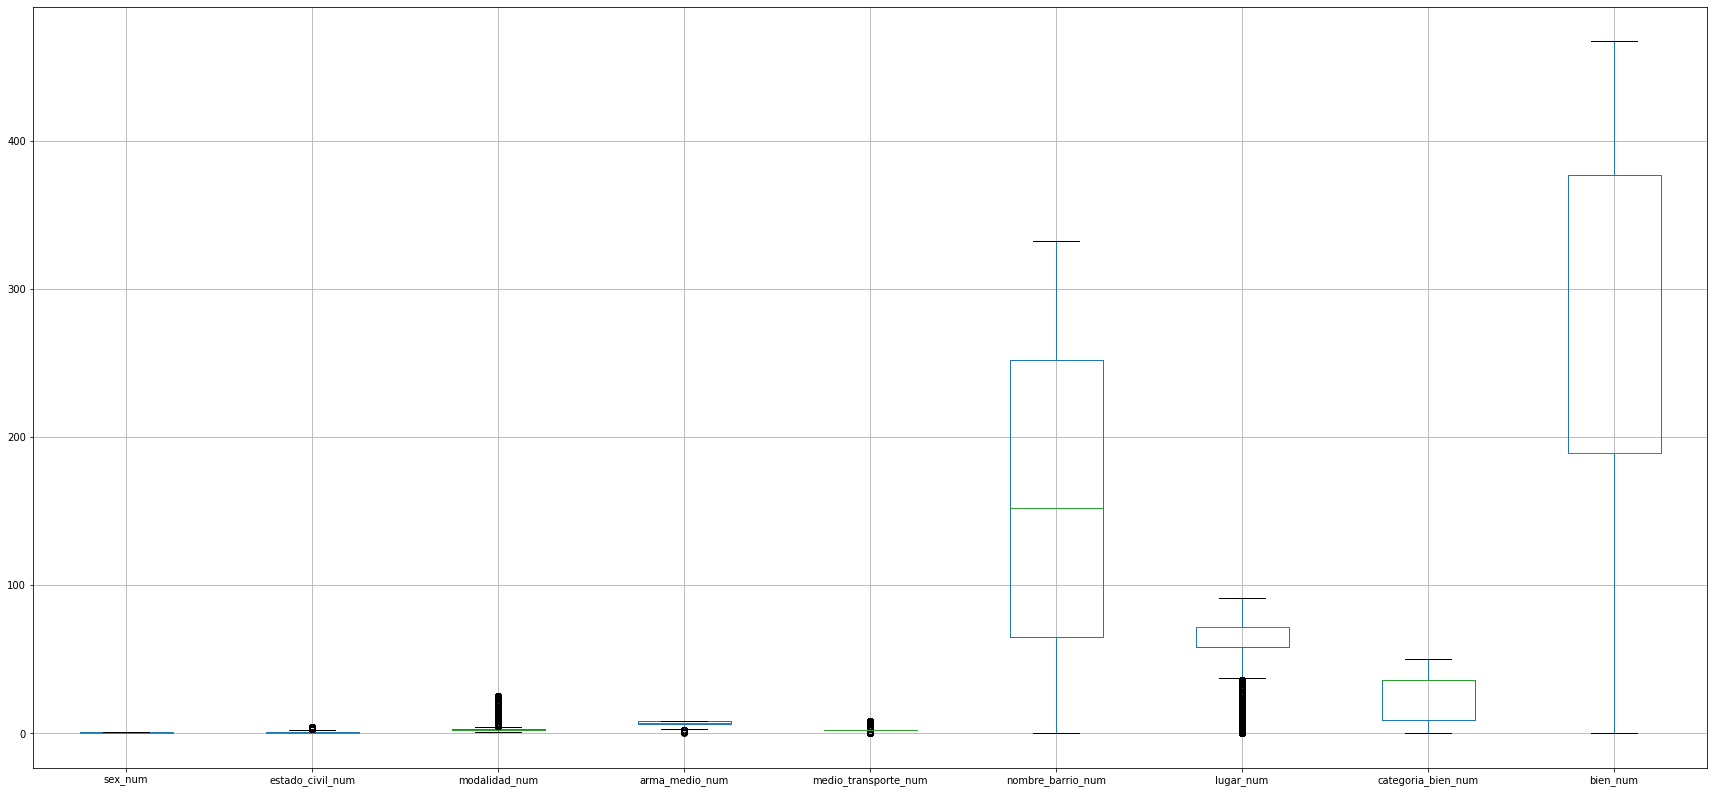

In [ ]:
df_hurto.boxplot(figsize=(30,14))
plt.show()

Diagrama de cajas y bigotes
* En el diagrama anterior tenemos las siguientes variables
-sex_num
-estado_civil_num
-modalidad_num
-arma_medio_num
-medio_transporte_num
-nombre_barrio_num
-lugar_num
-categoria_bien_num
-bien_num

* Mediana:
La mediana está representada por la línea en la caja. La mediana es una medida común del centro de sus datos. La mitad de las observaciones es menor que o igual al valor y la mitad es mayor que o igual al valor.
Caja de rango intercuartil
La caja de rango intercuartil representa el 50% intermedio de los datos. Muestra la distancia entre el primer cuartil y el tercer cuartil (Q3-Q1).
Bigotes
Los bigotes se extienden de cualquier lado de la caja. Los bigotes representan los rangos del 25 % de valores de datos de la parte inferior y el 25 % de la parte inferior, excluyendo los valores atípicos.

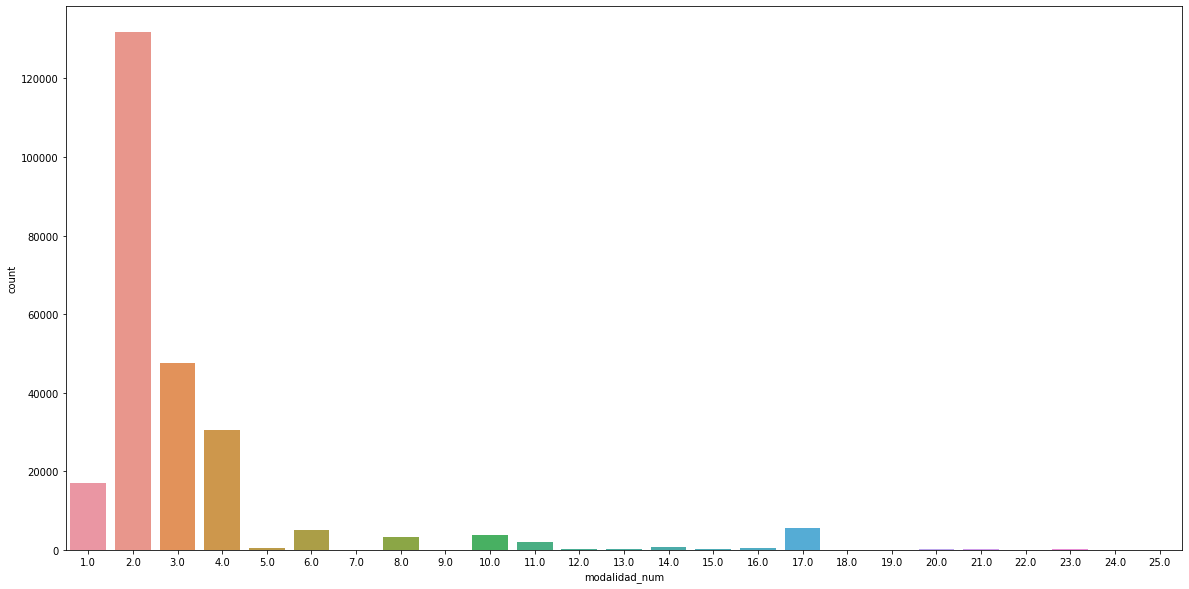

In [ ]:
ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="modalidad_num", data=df_hurto)


Diagrama de barras
* podemos ver que la modalidad hurto que mas se repite es la 2 que corresponde a atraco, con mas de 120.000 hurtos bajo esta modalidad.

* le sigue la 3 (cosquilleo) con más de 40.000 hurtos bajo esta modalidad.

* la 3er modalidad de hurto más común es la 4(Clonación de tarjeta) con mas de 20.000 hurtos.


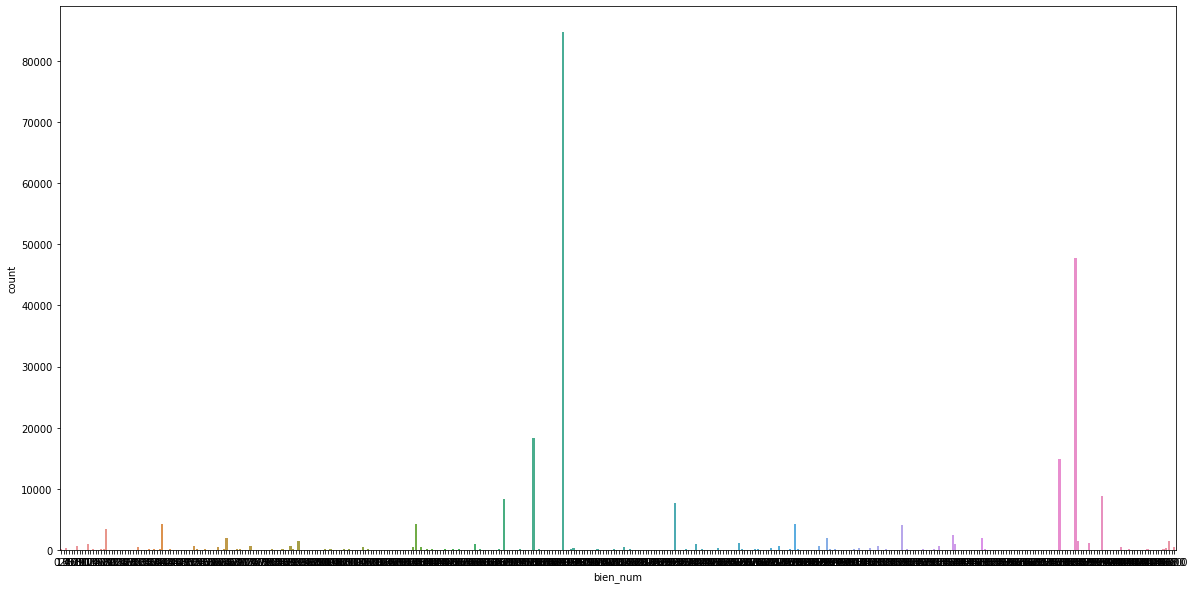

In [ ]:

ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="bien_num", data=df_hurto)

En la grafica anterior mostramos los bienes robados y la cantidad de estos que han sido robados

In [ ]:
df_hurto.mode()


NameError: ignored

* sex_num=0.0 corresponde a hombre
* estado_civil_num=0.0 corresponde a soltero
* modalidad_num=2.0 corresponde Atraco
* arma_medio_num=7.0 corresponde a objeto contundente
* medio_transporte_num= 2.0 corresponde a caminata 
* nombre_barrio_num= 35.0 corresponde a La candelaria
* lugar_num= 72.0 corresponde a vía pública
* categoria_bien_num= 36.0 corresponde a tecnología
* bien_num= 189.0 corresponde a celular


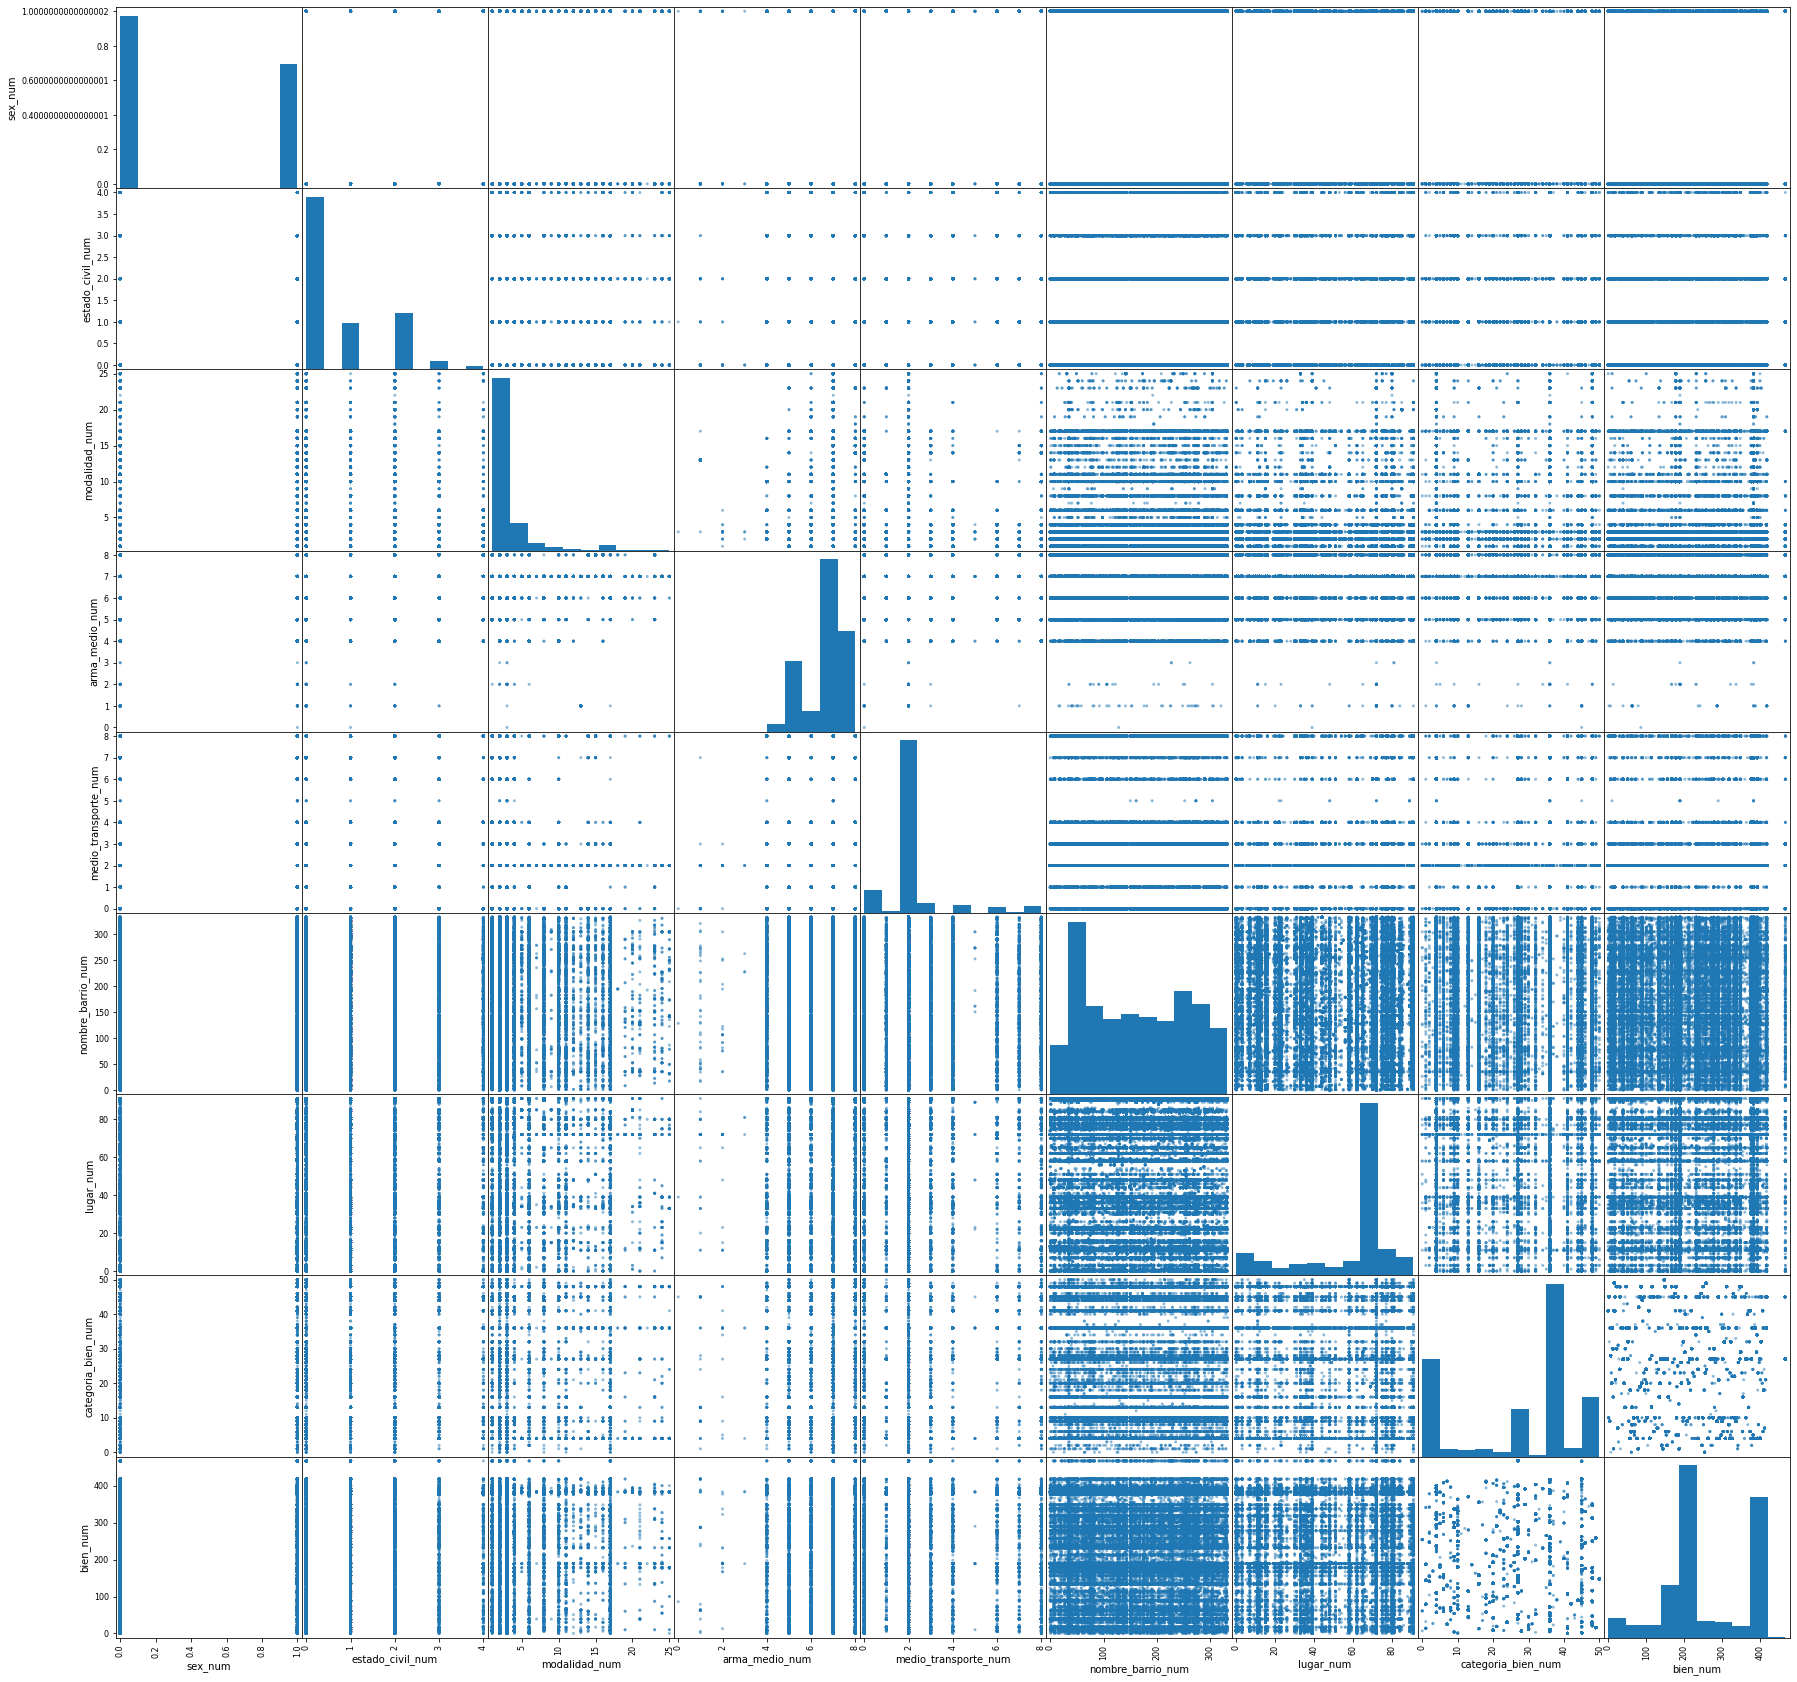

In [ ]:
pd.plotting.scatter_matrix(df_hurto, figsize=(30,30))
plt.show()

# Regresión
En estas graficas de regresión podemos ver la relación que tienen las varibales 
entre si, en este caso se muestran las relaciones de la variables horizontales 
con las variables ubicadas verticalmente, así podemos ver como se comportan para poder realizar las predicciones deseadas

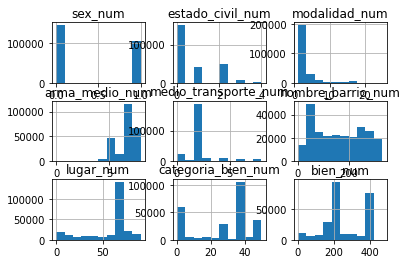

In [ ]:
df_hurto.hist()
plt.show()

In [ ]:
corr_df = df_hurto.corr()
corr_df.style.background_gradient(cmap='icefire', axis=None)

,sex_num,estado_civil_num,modalidad_num,arma_medio_num,medio_transporte_num,nombre_barrio_num,lugar_num,categoria_bien_num,bien_num
sex_num,1.000000,0.034968,-0.019665,0.001181,0.037930,-0.017578,0.012748,0.021275,0.011071
estado_civil_num,0.034968,1.000000,0.048875,0.065549,-0.030289,-0.005408,0.007309,-0.026263,0.019673
modalidad_num,-0.019665,0.048875,1.000000,-0.095727,-0.040129,0.024947,-0.091102,-0.056865,0.014416
arma_medio_num,0.001181,0.065549,-0.095727,1.000000,-0.043095,0.049298,-0.004175,-0.029212,0.016165
medio_transporte_num,0.037930,-0.030289,-0.040129,-0.043095,1.000000,-0.013140,-0.148773,0.000427,0.011971
nombre_barrio_num,-0.017578,-0.005408,0.024947,0.049298,-0.013140,1.000000,-0.013009,-0.000235,-0.005373
lugar_num,0.012748,0.007309,-0.091102,-0.004175,-0.148773,-0.013009,1.000000,-0.026381,0.019471
categoria_bien_num,0.021275,-0.026263,-0.056865,-0.029212,0.000427,-0.000235,-0.026381,1.000000,-0.637204
bien_num,0.011071,0.019673,0.014416,0.016165,0.011971,-0.005373,0.019471,-0.637204,1.000000


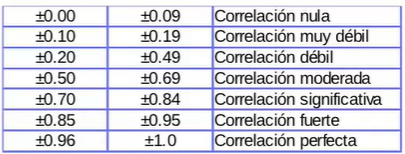

# Entrenamiento del algoritmo

Dividimos las variables de entrada y de salida, siendo X el conjunto de variables de entrada y Y la variable de salida.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df_hurto.iloc[:,0:9]
Y = df_hurto["modalidad_num"]

print(X.shape)
print(Y.shape)

(249845, 9)
(249845,)


Del dataset que tenemos utilizamos un 70% para entrenar el algoritmo y el 30% para realizar las pruebas.

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.30)

Se estandarizan las caracteristicas del dataframe.

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
print("X Entrenamiento")
X_train.shape

X Entrenamiento


(174891, 9)

In [ ]:
print("X Prueba")
X_test.shape

X Prueba


(74954, 9)

In [ ]:
print("Y Entrenamiento")
Y_train.shape

Y Entrenamiento


(174891,)

In [ ]:
print("Y Prueba")
Y_test.shape

Y Prueba


(74954,)

#Modelos utilizados

* LOGISTIC REGRESSION:
La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria

* DECISION TREE CLASSIFIER:
Árbol de decisión o Decisión Tree Classification es un tipo de algoritmo de aprendizaje supervisado que se utiliza principalmente en problemas de clasificación, aunque funciona para variables de entrada y salida categóricas como continuas.

* RANDOM FOREST CLASSIFIER:
Random forest (o random forests) también conocidos en castellano como '"Bosques Aleatorios"' es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia

In [ ]:
def modelos(X_train,Y_train): 
      # Regression logistica    
      from sklearn.linear_model import LogisticRegression
      log=LogisticRegression(max_iter=100000)    
      log.fit(X_train,Y_train)        
      # Árboles de decisión    
      from sklearn.tree import DecisionTreeClassifier    
      arbol=DecisionTreeClassifier(criterion = "entropy", random_state=0)    
      arbol.fit(X_train,Y_train)        
      #RFC    
      from sklearn.ensemble import RandomForestClassifier    
      forest=RandomForestClassifier(n_estimators=10, criterion = "entropy", random_state=0)
      forest.fit(X_train,Y_train)
      
            
      
      #imprimir la exactitud de cada modelo en el dataset de entrenamiento        
      print("[0]Exactitud del entrenamiento Logistic Regression:",log.score(X_train,Y_train))    
      print("[1]Exactitud del entrenamiento Decision Tree Classifier:",arbol.score(X_train,Y_train))    
      print("[2]Exactitud del entrenamiento Random Forest Classifier:",forest.score(X_train,Y_train))
      

      
      return log, arbol, forest
model = modelos (X_train,Y_train)

[0]Exactitud del entrenamiento Logistic Regression: 0.9914003579372295
[1]Exactitud del entrenamiento Decision Tree Classifier: 1.0
[2]Exactitud del entrenamiento Random Forest Classifier: 0.9999542572230704


#Para cada modelo sacamos la matriz de confusión

La matriz de confusión es una herramienta muy útil para valorar cómo de bueno es un modelo clasificación basado en aprendizaje automático. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error.

In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print ("model: ",i)
    cm=confusion_matrix(Y_test, model[i].predict(X_test))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print(cm)
    print("La exactitud del modelo en los datos de prueba es= ", (TP+TN)/(TP+TN+FN+FP))
    print()

model:  0
[[14333     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0  5044     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 39610     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0  9087     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0   106    16     5     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1512     0    21     0     4     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     5     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0   

* como podemos observar el algoritmo de Logistic Regression en el resultado de presición obtuvo un puntaje de 0.9914003579372295 y en el modelo de datos de prueba tuvo un puntaje de 1.0

* el modelo de Decision Tree Classifier en el resultado de presición obtuvo un puntaje de 1.0 y en el modelo de datos de prueba tuvo un puntaje de 1.0 por lo que mantuvo su rendimiento 

* Random Forest Classifier en el resultado de presición obtuvo un puntaje de 0.9999542572230704 y en el modelo de datos de prueba tubo un puntaje de 1.0

***dado esto se debe de seleccionar el modelo con menos variabilidad entre su puntaje del resutado de presición y su puntaje en el modelo de datos de prueba, por lo cual el modelo con el que se puede tener mayor eficacia en las predicciones es el Decision Tree Classifier***



# Predicciones

#Logistic Regression



In [ ]:
print("Logistic Regression")
LogisticR.predict([[0,2,0,7,2,117,80,48,178],[0,2,3,7,2,106,72,48,167]])

Logistic Regression


array([19., 19.])

#Decision Tree Clasifier

In [ ]:
print("Decision Tree Classifier")
DTC.predict([[0,2,0,7,2,117,80,48,178],[0,2,3,7,2,106,72,48,167]])

Decision Tree Classifier


array([ 2., 11.])

#Random Forest Classifier



In [ ]:
print("Random Forest Classifier")
RFC.predict([[0,2,0,7,2,117,80,48,178],[0,2,3,7,2,106,72,48,167]])

Random Forest Classifier


array([ 2., 13.])

-Como vemos anteriormente tenemos 3 tipos de modelos (1.Logistic Regression, 2.Decision Tree Classifier, 3.Random Forest Classifier), los cuales dados ciertos parámetros muestran la variable numerica de la modalidad de robo más usada en la parte X y la parte Y.

-Por el entrenamiento en X tanto en Decision Tree Classifier como en Random Forest Classifier vemos repetida la modalidad de robo numero 2 (Atraco) y que Logistic Regression no comparte ningun resultado con los demás modelos predictivos, también decidimos optar por este resultado ya que cuenta con una mayor presición en el Decision Tree Classifier.

-Por el entrenamiento en Y igualmente decidimos tomar la mayor presición, Decision Tree Clasifier que nos trae la modalidad de robo número 11(Paquete Chileno).

# Conclusiones


*   La matriz de correlación es un gráfico importante en el proceso de limpieza de los datos, ya que esta nos dice la relación que tiene una variable con todas las demás. Esta nos entrega un valor el cual nos dice que valor de relación tiene.

*   Es demasiado importante analizar bien que variables le estamos pasando al algoritmo a la hora de entrenar, ya que alguna variable que no influya bien en el problema nos puede perjudicar el entrenamiento.

*   Es bueno probar con diferentes algoritmos, asi se conoce la presición que ofrece cada uno y poder escoger el que mas se adapte a la solucion del proyecto

*   Al conocer varios tipos de transformacion de datos, es importante saber cual usar para lo que se necesite hacer, ya que se pudo utilizar One Hot Coding y Ordinal Encoder
